In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

**Import outage data**

In [2]:
# Print sheet names
outages = pd.read_excel('data/Osun Region Interruption for 2020.xlsx', sheet_name = None)
sheets = outages.keys()
sheets

dict_keys(['JAN 33KV', 'FEB 33KV', 'MARCH 33KV', 'APRIL 33KV', 'MAY 33KV', 'JUNE 33KV', 'JULY 33KV', 'AUGUST 33KV', 'SEPT 33KV', 'OCT 33KV', 'NOV 33KV', 'DEC 33KV', 'JAN 11KV', 'FEB 11KV', 'MAR 11KV', 'APRIL 11KV', 'MAY 11KV ', 'JUNE 11KV', 'JULY 11KV', 'AUGUST 11KV', 'SEPT 11KV', 'OCT 11KV', 'NOV 11KV', 'DEC 11KV', 'Sheet25'])

In [3]:
# Convert sheets from dict_keys to list
sheets = list(sheets)
sheets

['JAN 33KV',
 'FEB 33KV',
 'MARCH 33KV',
 'APRIL 33KV',
 'MAY 33KV',
 'JUNE 33KV',
 'JULY 33KV',
 'AUGUST 33KV',
 'SEPT 33KV',
 'OCT 33KV',
 'NOV 33KV',
 'DEC 33KV',
 'JAN 11KV',
 'FEB 11KV',
 'MAR 11KV',
 'APRIL 11KV',
 'MAY 11KV ',
 'JUNE 11KV',
 'JULY 11KV',
 'AUGUST 11KV',
 'SEPT 11KV',
 'OCT 11KV',
 'NOV 11KV',
 'DEC 11KV',
 'Sheet25']

**Create outage Data Frame**

In [4]:
# Create DataFrame from outages workbook
for i in np.arange(0, len(sheets)):
    sheet = sheets[i]
    globals()[sheet] = pd.read_excel('data/Osun Region Interruption for 2020.xlsx', sheet_name = sheet)
    if i == 0:
        df = globals()[sheet]
        df['Feeder'] = sheet
    else: 
        df2 = globals()[sheet]
        df2['Feeder'] = sheet
        df = df.append(df2)
# Create copy of df in case it gets messed up so that we don't have to rerun this cell
df = df.reset_index()
df_copy = df.copy()
df

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder
0,0,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC E/F,99,1,09:46:00,10:25:00,0.65,26150.0,NaN,16997.500000,20.4,Tried & Okay.,JAN 33KV
1,1,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,2.0,EDC E/F,99,1,13:44:00,13:51:00,0.116667,26150.0,NaN,3050.833333,18.2,OSBC 33kV line isolator opened on fault suspect.,JAN 33KV
2,2,2020-01-01 00:00:00,Ilesa,Ibokun 33KV,1.0,EDC E/F,2A,1,03:16:00,11:15:00,7.983333,3209.0,NaN,25618.516667,2.2,Kajola 33kv line isolator opened on fault susp...,JAN 33KV
3,3,2020-01-01 00:00:00,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,99,1,22:17:00,23:59:00,1.7,4000.0,NaN,6800.000000,3,Crossed over to the next day.,JAN 33KV
4,4,2020-02-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC O/C,99,6,14:38:00,14:41:00,0.05,26150.0,NaN,1307.500000,17.7,Tried & Okay.,JAN 33KV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28247,1944,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,1.0,EDC L/S,1F,7,00:00:00,02:49:00,2.49,3719,3719,10785.100000,2.9,load limitation,DEC 11KV
28248,1945,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,1.0,EDC L/S,1F,7,12:26:00,16:40:00,4.14,5642,5642,16361.800000,2.9,Load Reduction,DEC 11KV
28249,1946,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,2.0,EDC L/S,1F,7,14:02:00,22:28:00,8.26,3719,3719,7809.900000,2.1,load limitation,DEC 11KV
28250,1947,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,2.0,EDC P/O,1I,7,16:44:00,18:02:00,1.18,5642,5642,16361.800000,2.9,To reconnect cut aluminium conductor on red ph...,DEC 11KV


In [5]:
# Get unique business hub names for cleaning
df['BUSINESS HUB'].unique()

array(['Osogbo', 'Ilesa ', 'Ikirun', 'EDE', 'ILE-IFE', nan, 'Ilesa',
       'OSOGBO', 'EDC E/F', 'ILE - IFE', 'IFE', 'Iki',
       datetime.time(23, 59), 'ikirun'], dtype=object)

In [6]:
# Get count of unique business hub names for cleaning
df.groupby(['BUSINESS HUB']).count()[['index']].sort_index

<bound method DataFrame.sort_index of               index
BUSINESS HUB       
23:59:00          1
EDC E/F           1
EDE            3792
IFE               2
ILE - IFE        11
ILE-IFE        9953
Iki               1
Ikirun         1958
Ilesa            64
Ilesa          5324
OSOGBO          292
Osogbo         6822
ikirun            5>

In [7]:
# Clean business hub names to 5:
# Osogbo, Ilesa, Ikirun, Ede, Ile-Ife
replacements = [["EDC E/F","EDE"], ["^IFE$","ILE-IFE"], ["ILE - IFE","ILE-IFE"], 
                ["Iki$","Ikirun"], ["Ilesa ","Ilesa"],["OSOGBO","Osogbo"], 
                ["ikirun","Ikirun"]]

for i in np.arange(0, len(replacements)):
    df['BUSINESS HUB'] = df['BUSINESS HUB'].replace(replacements[i][0], 
                                                    replacements[i][1], regex = True)

df = df.drop(df[(df['BUSINESS HUB'] == '23:59:00')].index)
    
df.groupby(['BUSINESS HUB']).count()[['index']].sort_index

<bound method DataFrame.sort_index of               index
BUSINESS HUB       
23:59:00          1
EDE            3793
ILE-IFE        9966
Ikirun         1964
Ilesa          5388
Osogbo         7114>

In [8]:
type(df.groupby(['BUSINESS HUB']).count()[['index']].index[0])

datetime.time

In [9]:
#Remove row where business hub is a time
df = df[df['BUSINESS HUB'].map(type)==str]

**Create & clean datetime columns**

In [10]:
# Split feeder column into voltage and month columns
#df = df_copy
df[['Month', 'Voltage']] = df['Feeder'].str.split(' ', expand=True).loc[:, 0:1]

# Create dictionary of months
# mo_dict = {'JAN':'01', 'FEB':'02', 'MARCH':'03', 'APRIL':'04', 'MAY':'05', 'JUNE':'06',
#            'JULY':'07', 'AUGUST':'08', 'SEPT':'09', 'OCT':'10', 'NOV':'11', 'DEC':'12'}
mo_dict = {'JAN':1, 'FEB':2, 'MARCH':3, 'MAR':3, 'APRIL':4, 'MAY':5, 'JUNE':6,
           'JULY':7, 'AUGUST':8, 'SEPT':9, 'OCT':10, 'NOV':11, 'DEC':12}

# Create numeric month column based on dictionary
# df['month_str'] = df['Month'].map(mo_dict)
# df['month'] = pd.to_numeric(df['month_str'])
df['month'] = df['Month'].map(mo_dict)
df

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month
0,0,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC E/F,99,1,09:46:00,10:25:00,0.65,26150.0,NaN,16997.500000,20.4,Tried & Okay.,JAN 33KV,JAN,33KV,1
1,1,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,2.0,EDC E/F,99,1,13:44:00,13:51:00,0.116667,26150.0,NaN,3050.833333,18.2,OSBC 33kV line isolator opened on fault suspect.,JAN 33KV,JAN,33KV,1
2,2,2020-01-01 00:00:00,Ilesa,Ibokun 33KV,1.0,EDC E/F,2A,1,03:16:00,11:15:00,7.983333,3209.0,NaN,25618.516667,2.2,Kajola 33kv line isolator opened on fault susp...,JAN 33KV,JAN,33KV,1
3,3,2020-01-01 00:00:00,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,99,1,22:17:00,23:59:00,1.7,4000.0,NaN,6800.000000,3,Crossed over to the next day.,JAN 33KV,JAN,33KV,1
4,4,2020-02-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC O/C,99,6,14:38:00,14:41:00,0.05,26150.0,NaN,1307.500000,17.7,Tried & Okay.,JAN 33KV,JAN,33KV,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28247,1944,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,1.0,EDC L/S,1F,7,00:00:00,02:49:00,2.49,3719,3719,10785.100000,2.9,load limitation,DEC 11KV,DEC,11KV,12
28248,1945,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,1.0,EDC L/S,1F,7,12:26:00,16:40:00,4.14,5642,5642,16361.800000,2.9,Load Reduction,DEC 11KV,DEC,11KV,12
28249,1946,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,2.0,EDC L/S,1F,7,14:02:00,22:28:00,8.26,3719,3719,7809.900000,2.1,load limitation,DEC 11KV,DEC,11KV,12
28250,1947,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,2.0,EDC P/O,1I,7,16:44:00,18:02:00,1.18,5642,5642,16361.800000,2.9,To reconnect cut aluminium conductor on red ph...,DEC 11KV,DEC,11KV,12


In [11]:
# print all dates to find any that are causing error when converting to datetime (e.g., //)
#df.iloc[:,0].unique()

In [12]:
# Clean original datetime column & add start and end datetime date columns to df

#pd.set_option("display.min_rows", None, "display.max_columns", None)

# clean original date column & create datetime version of original datetime column
df.iloc[:,1] = df.iloc[:,1].astype(str)
df.iloc[:,1] = df.iloc[:,1].replace(r"5/12//2020", r"5/12/2020")
df['date_orig'] = pd.to_datetime(df.iloc[:,1], dayfirst=True)
df.dropna(subset = ['date_orig'], inplace = True)

# Clean Start Time and Time Restored columns
df['Start Time'] = df['Start Time'].replace(";",":", regex = True)
df['Time Restored'] = df['Time Restored'].replace(";",":", regex = True)
df['Start Time'] = df['Start Time'].replace("::",":", regex = True)
df['Time Restored'] = df['Time Restored'].replace("::",":", regex = True)

# Parse original datetime column into year/22/33, and extract month & day
# Note that original datasource sometimes put day before month (DD/MM) and sometimes put month before day (MM/DD)
# So have to create a new date column with consistent formatting, determining formatting based on month given in sheet name
df['year'] = df['date_orig'].dt.year#.astype(int)
df['date_22'] = df['date_orig'].dt.month
df['date_33'] = df['date_orig'].dt.day
df['day'] = df['date_33']
df

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,...,REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day
0,0,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC E/F,99,1,09:46:00,10:25:00,...,Tried & Okay.,JAN 33KV,JAN,33KV,1,2020-01-01,2020,1,1,1
1,1,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,2.0,EDC E/F,99,1,13:44:00,13:51:00,...,OSBC 33kV line isolator opened on fault suspect.,JAN 33KV,JAN,33KV,1,2020-01-01,2020,1,1,1
2,2,2020-01-01 00:00:00,Ilesa,Ibokun 33KV,1.0,EDC E/F,2A,1,03:16:00,11:15:00,...,Kajola 33kv line isolator opened on fault susp...,JAN 33KV,JAN,33KV,1,2020-01-01,2020,1,1,1
3,3,2020-01-01 00:00:00,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,99,1,22:17:00,23:59:00,...,Crossed over to the next day.,JAN 33KV,JAN,33KV,1,2020-01-01,2020,1,1,1
4,4,2020-02-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC O/C,99,6,14:38:00,14:41:00,...,Tried & Okay.,JAN 33KV,JAN,33KV,1,2020-02-01,2020,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28247,1944,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,1.0,EDC L/S,1F,7,00:00:00,02:49:00,...,load limitation,DEC 11KV,DEC,11KV,12,2020-12-29,2020,12,29,29
28248,1945,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,1.0,EDC L/S,1F,7,12:26:00,16:40:00,...,Load Reduction,DEC 11KV,DEC,11KV,12,2020-12-29,2020,12,29,29
28249,1946,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,2.0,EDC L/S,1F,7,14:02:00,22:28:00,...,load limitation,DEC 11KV,DEC,11KV,12,2020-12-29,2020,12,29,29
28250,1947,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,2.0,EDC P/O,1I,7,16:44:00,18:02:00,...,To reconnect cut aluminium conductor on red ph...,DEC 11KV,DEC,11KV,12,2020-12-29,2020,12,29,29


In [13]:
# Find records for which year = 2019
df[df['year']==2019]

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,...,REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day
5420,0,31/12/2019,Osogbo,Igbona 11kV,8.0,TCN L/S,1F,7,00:00:00,00:35:00,...,Transformer load limitation.,JAN 11KV,JAN,11KV,1,2019-12-31,2019,12,31,31
5451,31,31/12/2019,ILE-IFE,Lagere 11kv,1.0,TCN L/S,1F,7,00:00:00,00:31:00,...,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2019-12-31,2019,12,31,31
5452,32,31/12/2019,ILE-IFE,Opa 11kv,2.0,TCN L/S,1F,7,00:00:00,05:10:00,...,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2019-12-31,2019,12,31,31
5453,33,31/12/2019,ILE-IFE,Ikire/Apomu 11kV,3.0,TCN L/S,1F,7,00:00:00,00:37:00,...,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2019-12-31,2019,12,31,31
5454,34,31/12/2019,ILE-IFE,Orona/Ita-Osa 11kv,4.0,TCN L/S,1F,7,00:00:00,00:32:00,...,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2019-12-31,2019,12,31,31
5455,35,31/12/2019,ILE-IFE,Famia Rd. 11kV,5.0,TCN L/S,1F,7,00:00:00,02:11:00,...,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2019-12-31,2019,12,31,31
5456,36,31/12/2019,ILE-IFE,Mokuro Rd 11kv,6.0,TCN L/S,1F,7,00:00:00,00:05:00,...,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2019-12-31,2019,12,31,31
5457,37,31/12/2019,ILE-IFE,Edunabon/Ipetumodu 11kv,7.0,TCN L/S,1F,7,00:00:00,04:08:00,...,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2019-12-31,2019,12,31,31
5588,168,2019-03-05 00:00:00,Osogbo,Gbongan Rd 11kV,8.0,TCN L/S,1F,7,12:55:00,16:12:00,...,To retension flung 11kv line at Omigade area.,JAN 11KV,JAN,11KV,1,2019-03-05,2019,3,5,5


In [14]:
# Clean year column
# to_rep = df[df['year']==2019].iloc[-1,1]
# df[df.iloc[:,1]==to_rep]

#df[df.iloc[:,1]=='2019-03-05 00:00:00'].iloc[0,1] = '2020-03-05 00:00:00'
#df[df.iloc[:,1]=='2019-03-05 00:00:00']
# df[df.iloc[:,1]=='2019-03-05 00:00:00'].at[5588,'year'] = 2020
# df[df.iloc[:,1]=='2019-03-05 00:00:00']
df.at[5588, 'year']=2020
df.at[5588, 'year']

2020

In [15]:
# Remove other observations whose year is 2019
df = df[df['year']!=2019]

In [16]:
# From looking at NaN in start_str & end_str below, some are caused b/c invalid dates were created
# Likely b/c sometimes last day of month ended up in sheet for following month (e.g., March 31 ended up in April)
# Since we were setting month based on the sheet, this was created invalid dates in some cases (e.g., April 31)
# The line below checks if the month from the sheet equals the month/date from the date column, and if not, 
# does the month - 1 equal the month/date from the time column. If this is the case, it corrects the month. 
df.loc[(df.month != df.date_33) & (df.month != df.date_22) & 
       ((df.month - 1 == df.date_22) | (df.month - 1 == df.date_33)), 
       ['month']] = df.month - 1
# Set day based on month column and month/day in original date column
df.loc[df.month == df.date_33, ['day']] = df.date_22
# Crate strings from outage start time, end time
df['start_str'] = df['Start Time'].astype(str)
df['end_str'] = df['Time Restored'].astype(str)
# Clean start & end string
df['start_str'] = df['start_str'].replace("\d\d\d\d-\d\d-\d\d","", regex = True)
df['end_str'] = df['end_str'].replace("\d\d\d\d-\d\d-\d\d","", regex = True)
# Create strings for date, and datetime for start date, end date 
df['date_str'] = df['year'].astype(str)+'/'+df['month'].astype(str)+'/'+df['day'].astype(str)#df['year'].astype(str)
df['start'] = pd.to_datetime(df['date_str'] + ' ' + df['start_str'], errors = 'coerce')
df['end'] = pd.to_datetime(df['date_str'] + ' ' + df['end_str'], errors = 'coerce')
df['start_hr'] = df['start'].apply(lambda x: x.hour)
#df['end_hr'] = df['end'].apply(lambda x: x.hour)
# df['start_round'] = pd.to_datetime(df['date_str'] + ' ' + df['start_hr'].astype(str)+':00:00', errors = 'coerce')
# df['end_round'] = pd.to_datetime(df['date_str'] + ' ' + df['end_hr'].astype(str)+':00:00', errors = 'coerce')
df['start_round'] = df['start'].apply(lambda x: x.replace(minute=0))
df['end_round'] = df['end'].apply(lambda x: x.replace(minute=0))
df

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_358/1548384114.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_str'] = df['Start Time'].astype(str)
/tmp/ipykernel_358/1548384114.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,...,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round
0,0,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC E/F,99,1,09:46:00,10:25:00,...,1,1,09:46:00,10:25:00,2020/1/1,2020-01-01 09:46:00,2020-01-01 10:25:00,9.0,2020-01-01 09:00:00,2020-01-01 10:00:00
1,1,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,2.0,EDC E/F,99,1,13:44:00,13:51:00,...,1,1,13:44:00,13:51:00,2020/1/1,2020-01-01 13:44:00,2020-01-01 13:51:00,13.0,2020-01-01 13:00:00,2020-01-01 13:00:00
2,2,2020-01-01 00:00:00,Ilesa,Ibokun 33KV,1.0,EDC E/F,2A,1,03:16:00,11:15:00,...,1,1,03:16:00,11:15:00,2020/1/1,2020-01-01 03:16:00,2020-01-01 11:15:00,3.0,2020-01-01 03:00:00,2020-01-01 11:00:00
3,3,2020-01-01 00:00:00,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,99,1,22:17:00,23:59:00,...,1,1,22:17:00,23:59:00,2020/1/1,2020-01-01 22:17:00,2020-01-01 23:59:00,22.0,2020-01-01 22:00:00,2020-01-01 23:00:00
4,4,2020-02-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC O/C,99,6,14:38:00,14:41:00,...,1,2,14:38:00,14:41:00,2020/1/2,2020-01-02 14:38:00,2020-01-02 14:41:00,14.0,2020-01-02 14:00:00,2020-01-02 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28247,1944,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,1.0,EDC L/S,1F,7,00:00:00,02:49:00,...,29,29,00:00:00,02:49:00,2020/12/29,2020-12-29 00:00:00,2020-12-29 02:49:00,0.0,2020-12-29 00:00:00,2020-12-29 02:00:00
28248,1945,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,1.0,EDC L/S,1F,7,12:26:00,16:40:00,...,29,29,12:26:00,16:40:00,2020/12/29,2020-12-29 12:26:00,2020-12-29 16:40:00,12.0,2020-12-29 12:00:00,2020-12-29 16:00:00
28249,1946,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,2.0,EDC L/S,1F,7,14:02:00,22:28:00,...,29,29,14:02:00,22:28:00,2020/12/29,2020-12-29 14:02:00,2020-12-29 22:28:00,14.0,2020-12-29 14:00:00,2020-12-29 22:00:00
28250,1947,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,2.0,EDC P/O,1I,7,16:44:00,18:02:00,...,29,29,16:44:00,18:02:00,2020/12/29,2020-12-29 16:44:00,2020-12-29 18:02:00,16.0,2020-12-29 16:00:00,2020-12-29 18:00:00


In [17]:
# Clean duration column
# In Duration column, there were 2 strings, 2 datetimes, and 10 nulls. Drop these. 
df = df[df['Duration (Hours)'].apply(type)!=str]
df = df[df['Duration (Hours)'].apply(type)!=dt.time]
df.dropna(subset = ['Duration (Hours)'], inplace = True)
df['Duration (Hours)'] = df['Duration (Hours)'].astype(float)
# All observations have duration values between 0 and 23 hours, except 1 which is 1,313 hrs
# This seems to be an outlier, so drop it
df = df[df['Duration (Hours)']<1000]
df

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,...,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round
0,0,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC E/F,99,1,09:46:00,10:25:00,...,1,1,09:46:00,10:25:00,2020/1/1,2020-01-01 09:46:00,2020-01-01 10:25:00,9.0,2020-01-01 09:00:00,2020-01-01 10:00:00
1,1,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,2.0,EDC E/F,99,1,13:44:00,13:51:00,...,1,1,13:44:00,13:51:00,2020/1/1,2020-01-01 13:44:00,2020-01-01 13:51:00,13.0,2020-01-01 13:00:00,2020-01-01 13:00:00
2,2,2020-01-01 00:00:00,Ilesa,Ibokun 33KV,1.0,EDC E/F,2A,1,03:16:00,11:15:00,...,1,1,03:16:00,11:15:00,2020/1/1,2020-01-01 03:16:00,2020-01-01 11:15:00,3.0,2020-01-01 03:00:00,2020-01-01 11:00:00
3,3,2020-01-01 00:00:00,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,99,1,22:17:00,23:59:00,...,1,1,22:17:00,23:59:00,2020/1/1,2020-01-01 22:17:00,2020-01-01 23:59:00,22.0,2020-01-01 22:00:00,2020-01-01 23:00:00
4,4,2020-02-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC O/C,99,6,14:38:00,14:41:00,...,1,2,14:38:00,14:41:00,2020/1/2,2020-01-02 14:38:00,2020-01-02 14:41:00,14.0,2020-01-02 14:00:00,2020-01-02 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28247,1944,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,1.0,EDC L/S,1F,7,00:00:00,02:49:00,...,29,29,00:00:00,02:49:00,2020/12/29,2020-12-29 00:00:00,2020-12-29 02:49:00,0.0,2020-12-29 00:00:00,2020-12-29 02:00:00
28248,1945,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,1.0,EDC L/S,1F,7,12:26:00,16:40:00,...,29,29,12:26:00,16:40:00,2020/12/29,2020-12-29 12:26:00,2020-12-29 16:40:00,12.0,2020-12-29 12:00:00,2020-12-29 16:00:00
28249,1946,2020-12-29 00:00:00,Ikirun,Ikirun Township 11kv Fdr,2.0,EDC L/S,1F,7,14:02:00,22:28:00,...,29,29,14:02:00,22:28:00,2020/12/29,2020-12-29 14:02:00,2020-12-29 22:28:00,14.0,2020-12-29 14:00:00,2020-12-29 22:00:00
28250,1947,2020-12-29 00:00:00,Ikirun,Ipetu-Ile 11kv Fdr,2.0,EDC P/O,1I,7,16:44:00,18:02:00,...,29,29,16:44:00,18:02:00,2020/12/29,2020-12-29 16:44:00,2020-12-29 18:02:00,16.0,2020-12-29 16:00:00,2020-12-29 18:00:00


In [18]:
# Find min & max date
date_min = df['start'].min()
date_max = df['end'].max()
date_min, date_max

(Timestamp('2020-01-01 00:00:00'), Timestamp('2020-12-31 23:59:00'))

In [19]:
# Look again at observations where year = 2019
pd.set_option("display.max_columns", 200)
df[df['year']==2019]
#df[df['day']==31]#[30:50]

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round


**Investigate NaN in cleaned start/end columns**

In [20]:
# Find start and end times resulting in nan
# Some have nonsensical dates (e.g., June/31 and Sept/31, which don't exist)
# Many have a start time of 00:00:00
nas = df[(df['start'].isna()==True) | (df['end'].isna()==True)]
#nas['type_st'] = nas['Start Time'].apply(type)
#nas['type_et'] = nas['Time Restored'].apply(type)
print(len(nas))
nas

7


,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round
278,278,27/1/2020,Ilesa,Ibokun 33KV,1.0,EDCO/C,2A,6,05:20:00,12:!9,0.999306,3209.0,NaN,2.600000,2.6,Kajola 33KV leg opened on suspected fault,JAN 33KV,JAN,33KV,1,2020-01-27,2020,1,27,27,05:20:00,12:!9,2020/1/27,2020-01-27 05:20:00,NaT,5.0,2020-01-27 05:00:00,NaT
619,303,19/2/2020,Ilesa,Ipetu-ijesa 33KV,1.0,EDC O/C,99,6,0.651389,23:59:00,8.350000,5570.0,NaN,46509.500000,6.8,Cross over to the next day,FEB 33KV,FEB,33KV,2,2020-02-19,2020,2,19,19,0.6513888888888889,23:59:00,2020/2/19,NaT,2020-02-19 23:59:00,NaN,NaT,2020-02-19 23:00:00
1603,360,21/4/2020,ILE-IFE,Orile-Owu 33kV,2.0,NaN,1D,7,NaN,NaN,0.000000,NaN,500.0,0.000000,NaN,To close Orile-Owu 33kv leg at Gbongan junction,APRIL 33KV,APRIL,33KV,4,2020-04-21,2020,4,21,21,nan,nan,2020/4/21,NaT,NaT,NaN,NaT,NaT
5089,123,2020-08-12 00:00:00,ILE-IFE,Ikire/Wasinmi 33kv,1.0,E/F,1D,1,00:00:00,NaN,0.200000,10000.0,17000.0,32000.000000,7.7,Ikire 33kv leg was opened on fault suspect at ...,DEC 33KV,DEC,33KV,12,2020-08-12,2020,8,12,8,00:00:00,nan,2020/12/8,2020-12-08 00:00:00,NaT,0.0,2020-12-08 00:00:00,NaT
5609,189,2020-04-01 00:00:00,Ilesa,Iwoye 11KV,1.0,TCN L/S,1F,7,16:58:00,0.75,1.033333,950,NaN,981.666667,1.7,Opened on bulk transformer load limitation,JAN 11KV,JAN,11KV,1,2020-04-01,2020,4,1,4,16:58:00,0.75,2020/1/4,2020-01-04 16:58:00,NaT,16.0,2020-01-04 16:00:00,NaT
12106,1178,21/4/2020,ILE-IFE,Mokuro rd 11kv,26.0,TCN L/S,1F,7,NaN,NaN,0.000000,0,1792.0,0.000000,NaN,Inadequate load allocation,APRIL 11KV,APRIL,11KV,4,2020-04-21,2020,4,21,21,nan,nan,2020/4/21,NaT,NaT,NaN,NaT,NaT
20406,1813,29/8/2020,ILE-IFE,Apomu 11kv,2.0,EDC L/S,1F,7,00:00:00,NaN,0.000000,5388,5388.0,0.000000,0.71,Inadequate load allocation,AUGUST 11KV,AUGUST,11KV,8,2020-08-29,2020,8,29,29,00:00:00,nan,2020/8/29,2020-08-29 00:00:00,NaT,0.0,2020-08-29 00:00:00,NaT


In [21]:
# Since there are only 8 nan start/end times out of 28,000+ observations, drop them & reset index
print('Initial df length: ', len(df))
df.dropna(subset = ['start', 'end'], inplace = True)
df = df.reset_index(drop = True)
print('New df length: ', len(df))

Initial df length:  28200
New df length:  28193


In [22]:
# # Checking if datatypes is the cause of conversion to datetime errors
# # (it wasn't, the issue was invalid dates being created, corrected above)
# # Print unique Start Time datatypes in full df
# print(df['Start Time'].apply(type).unique())
# # Print unique Start Time datatypes in nan df to see if there's a difference/if this could be the cause
# print(nas['Start Time'].apply(type).unique())
# # Print unique date_str datatypes in full df
# print(df['date_str'].apply(type).unique())
# # Print unique date_str datatypes in nan df to see if there's a difference/if this could be the cause
# print(nas['date_str'].apply(type).unique())

**Investigate NaN in duration column**

In [23]:
# Create new cleaned, numeric duration column
replacements = [["..","."], [",","."]]
for i in np.arange(0, len(replacements)):
    df['Duration (Hours)'] = df['Duration (Hours)'].replace(replacements[i][0], replacements[i][1], regex = True)
df['duration'] = pd.to_numeric(df['Duration (Hours)'], errors = 'coerce')
df[df['duration'].isna()==True]

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round,duration


**Cleaning start & end columns** 

In [24]:
# To figure out which observation is throwing an error in subtracting start from end, 
# Iteratively subtract start from end, and
# Print index number creating error, total length of df, and df for that index to investigate issue
test = []
for i in np.arange(0, len(df)):
    test.append(df['end'][i] - df['start'][i])
print(len(test), len(df))
df[len(test):len(test)+1]

28193 28193


,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round,duration


In [25]:
# Check data types in case that could be an issue
df['end'].apply(type).unique(), df['start'].apply(type).unique()

(array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object),
 array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object))

**EDA of start & end time data**

In [26]:
# Plot count of observations by start time
# Question for Jessica:
# There are many outages that start at 00:00:00, and many outages that end at 23:59:00
# This is seems to imply that for many observations, the minute-level outage data are unreliable
# Would it be more appropriate to aggregate up to the day level?

# sts = df.groupby(['start_str']).count()['index']
# plt.plot(sts.index, sts, label = 'start time')
# ets = df.groupby(['end_str']).count()['index']
# plt.plot(ets.index, ets, label = 'end time')
# plt.xlabel('Start/End Time')
# plt.xticks(rotation = 90)
# plt.ylabel('# Observations')
# plt.title('Count of observations by start & end time')
# plt.legend()
# plt.show()

# see if potentially continuing over multiple days
# if unreliable, could do daily

In [27]:
# Print full list of start and end times
#sts, ets

Looking at anomalous start/end time types

In [28]:
# Replace 3777 with start time of 00:00
df[df['Start Time'].apply(type)==str]['Start Time']

3777    0:00
Name: Start Time, dtype: object

In [29]:
df[df['Time Restored'].apply(type)==str]['Time Restored']

1043      23:40
1050      23:59
7025     06:024
27100     10:40
Name: Time Restored, dtype: object

In [30]:
df[df['start_str'].apply(len)!=8]['start_str']

2243     04:33:36
3777         0:00
Name: start_str, dtype: object

In [31]:
df[df['end_str'].apply(len)!=8]['end_str']

577       00:00:00
1024      00:00:00
1039      11:02:24
1043         23:40
1050         23:59
1518      05:59:00
1618      09:21:36
2243      05:45:36
2686      09:21:36
4158      13:12:00
7025        06:024
8705      00:00:00
8795      00:00:00
10824     01:55:12
16200     00:00:00
23705     11:02:24
23972     09:58:00
27100        10:40
Name: end_str, dtype: object

In [32]:
t = df['end'][0]
tmin = df['start'][0]
tmax = df['end'][0]
(t>=tmin) & (t<=tmax)

True

In [33]:
df[df['Name of Affected Feeder']=='Efon/Osu 33KV']

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round,duration
3,3,2020-01-01 00:00:00,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,99,1,22:17:00,23:59:00,1.700000,4000.0,NaN,6800.000000,3,Crossed over to the next day.,JAN 33KV,JAN,33KV,1,2020-01-01,2020,1,1,1,22:17:00,23:59:00,2020/1/1,2020-01-01 22:17:00,2020-01-01 23:59:00,22.0,2020-01-01 22:00:00,2020-01-01 23:00:00,1.700000
10,10,2020-02-01 00:00:00,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,2A,1,00:00:00,13:14:00,13.233333,4000.0,NaN,52933.333333,2.2,Isolation of Osu 33kV leg was opened on fault ...,JAN 33KV,JAN,33KV,1,2020-02-01,2020,2,1,2,00:00:00,13:14:00,2020/1/2,2020-01-02 00:00:00,2020-01-02 13:14:00,0.0,2020-01-02 00:00:00,2020-01-02 13:00:00,13.233333
45,45,2020-07-01 00:00:00,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,2A,1,15:15:00,16:55:00,3.000000,4000.0,NaN,12000.000000,1.7,Osu 33kv leg opened on suspected fault,JAN 33KV,JAN,33KV,1,2020-07-01,2020,7,1,7,15:15:00,16:55:00,2020/1/7,2020-01-07 15:15:00,2020-01-07 16:55:00,15.0,2020-01-07 15:00:00,2020-01-07 16:00:00,3.000000
98,98,13/1/2020,Ilesa,Efon/Osu 33KV,1.0,EDC O/C,2A,6,21:17:00,23:59:00,2.700000,4000.0,NaN,10800.000000,4.5,Crossed over to the next day,JAN 33KV,JAN,33KV,1,2020-01-13,2020,1,13,13,21:17:00,23:59:00,2020/1/13,2020-01-13 21:17:00,2020-01-13 23:59:00,21.0,2020-01-13 21:00:00,2020-01-13 23:00:00,2.700000
115,115,13/1/2020,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,2A,1,00:00:00,10:15:00,10.250000,4000.0,NaN,41000.000000,4.5,Isolation of Osu 33kv leg at Ilaje on fault su...,JAN 33KV,JAN,33KV,1,2020-01-13,2020,1,13,13,00:00:00,10:15:00,2020/1/13,2020-01-13 00:00:00,2020-01-13 10:15:00,0.0,2020-01-13 00:00:00,2020-01-13 10:00:00,10.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,342,20/12/2020,Ilesa,Efon/Osu 33KV,1.0,E/F,2A,1,10:52:00,11:35:00,23.983333,4000.0,NaN,17320.000000,2.6,Osu 33kv leg was opened at ilaje on fault susp...,DEC 33KV,DEC,33KV,12,2020-12-20,2020,12,20,20,10:52:00,11:35:00,2020/12/20,2020-12-20 10:52:00,2020-12-20 11:35:00,10.0,2020-12-20 10:00:00,2020-12-20 11:00:00,23.983333
5310,363,21/12/2020,Ilesa,Efon/Osu 33KV,1.0,E/F,2A,1,03:03:00,10:23:00,7.333333,4000.0,NaN,29333.333333,2.8,Opening of Efon-Alaaye and Osu 33KV legs on su...,DEC 33KV,DEC,33KV,12,2020-12-21,2020,12,21,21,03:03:00,10:23:00,2020/12/21,2020-12-21 03:03:00,2020-12-21 10:23:00,3.0,2020-12-21 03:00:00,2020-12-21 10:00:00,7.333333
5315,368,22/12/2020,Ilesa,Efon/Osu 33KV,1.0,O/C,2A,6,04:25:00,09:55:00,5.500000,4000.0,NaN,17320.000000,2.4,Osu and Efon 33kv legs were opened at ilaje an...,DEC 33KV,DEC,33KV,12,2020-12-22,2020,12,22,22,04:25:00,09:55:00,2020/12/22,2020-12-22 04:25:00,2020-12-22 09:55:00,4.0,2020-12-22 04:00:00,2020-12-22 09:00:00,5.500000
5350,403,25/12/2020,Ilesa,Efon/Osu 33KV,1.0,E/F,2A,1,05:49:00,10:51:00,5.033333,4000.0,NaN,20133.333333,2.7,Opening of Efon-Alaaye and Osu 33KV legs on su...,DEC 33KV,DEC,33KV,12,2020-12-25,2020,12,25,25,05:49:00,10:51:00,2020/12/25,2020-12-25 05:49:00,2020-12-25 10:51:00,5.0,2020-12-25 05:00:00,2020-12-25 10:00:00,5.033333


In [34]:
df[df['start_str']=='00:00:00']

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round,duration
10,10,2020-02-01 00:00:00,Ilesa,Efon/Osu 33KV,1.0,EDC E/F,2A,1,00:00:00,13:14:00,13.233333,4000.0,NaN,52933.333333,2.2,Isolation of Osu 33kV leg was opened on fault ...,JAN 33KV,JAN,33KV,1,2020-02-01,2020,2,1,2,00:00:00,13:14:00,2020/1/2,2020-01-02,2020-01-02 13:14:00,0.0,2020-01-02,2020-01-02 13:00:00,13.233333
25,25,2020-04-01 00:00:00,Ilesa,Ibokun 33KV,1.0,EDC O/C,2A,6,00:00:00,15:10:00,15.166667,3209.0,NaN,48669.833333,2.4,Kajola 33kV leg was opened on fault suspect,JAN 33KV,JAN,33KV,1,2020-04-01,2020,4,1,4,00:00:00,15:10:00,2020/1/4,2020-01-04,2020-01-04 15:10:00,0.0,2020-01-04,2020-01-04 15:00:00,15.166667
26,26,2020-04-01 00:00:00,Ilesa,IJEBU JESA 33KV FEEDER,1.0,EDC E/F,2A,1,00:00:00,09:53:00,9.883333,10865.0,NaN,107382.416667,6.7,Esa-Oke/Okemesi 33KV leg was opened on fault s...,JAN 33KV,JAN,33KV,1,2020-04-01,2020,4,1,4,00:00:00,09:53:00,2020/1/4,2020-01-04,2020-01-04 09:53:00,0.0,2020-01-04,2020-01-04 09:00:00,9.883333
42,42,2020-06-01 00:00:00,EDE,Iwo/Ejigbo 33kV feeder,1.0,EDC E/F,99,1,00:00:00,14:04:00,14.066667,39197.0,NaN,551371.133333,15,Branches of trees were cut from the line at wa...,JAN 33KV,JAN,33KV,1,2020-06-01,2020,6,1,6,00:00:00,14:04:00,2020/1/6,2020-01-06,2020-01-06 14:04:00,0.0,2020-01-06,2020-01-06 14:00:00,14.066667
54,54,2020-07-01 00:00:00,ILE-IFE,Ile Ife Township 33kV,1.0,EDC E/F,1G,1,00:00:00,16:20:00,16.333333,39126.0,39126.0,289532.400000,7.4,Retermintion of upriser cable at IFE TCN switc...,JAN 33KV,JAN,33KV,1,2020-07-01,2020,7,1,7,00:00:00,16:20:00,2020/1/7,2020-01-07,2020-01-07 16:20:00,0.0,2020-01-07,2020-01-07 16:00:00,16.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28161,1917,30/12/2020,Osogbo,NCC 11KV,14.0,L/S,1F,7,00:00:00,01:30:00,1.500000,4805,NaN,7207.500000,4,Transformer load limitation.,DEC 11KV,DEC,11KV,12,2020-12-30,2020,12,30,30,00:00:00,01:30:00,2020/12/30,2020-12-30,2020-12-30 01:30:00,0.0,2020-12-30,2020-12-30 01:00:00,1.500000
28162,1918,30/12/2020,Osogbo,Ayepe 11kv,16.0,F/O,NaN,NaN,00:00:00,14:07:00,14.116667,4234,NaN,59769.966667,2.6,Due to opening of OSBC 33kv isolator on fault ...,DEC 11KV,DEC,11KV,12,2020-12-30,2020,12,30,30,00:00:00,14:07:00,2020/12/30,2020-12-30,2020-12-30 14:07:00,0.0,2020-12-30,2020-12-30 14:00:00,14.116667
28185,1941,31/12/2020,EDE,ODO ORI,6.0,L/S,1F,7,00:00:00,09:05:00,9.083333,9561,NaN,86845.750000,5,Restored.,DEC 11KV,DEC,11KV,12,2020-12-31,2020,12,31,31,00:00:00,09:05:00,2020/12/31,2020-12-31,2020-12-31 09:05:00,0.0,2020-12-31,2020-12-31 09:00:00,9.083333
28187,1943,31/12/2020,EDE,Iwo township 11 kV feeder.,8.0,E/F,99,1,00:00:00,05:45:00,5.750000,9135,NaN,52526.250000,3.5,Trial Okay,DEC 11KV,DEC,11KV,12,2020-12-31,2020,12,31,31,00:00:00,05:45:00,2020/12/31,2020-12-31,2020-12-31 05:45:00,0.0,2020-12-31,2020-12-31 05:00:00,5.750000


In [35]:
# # Test method for adding column with all minutes in between start and end time
# start = df['start'][0]
# stop = df['end'][0]
# # Change in minutes
# dmin = (stop - start).total_seconds()/60 + 1
# tstamps = pd.date_range(start, stop, dmin)
# tstamps

**Create dataframe of all minutes & dates between min & max time in dataset**

In [36]:
# Find min and max dates
date_min = df['start'].min()
date_max = df['end'].max()
days = date_max - date_min
minutes = days.total_seconds()/60 #+ 24*60
hours = round(minutes/60)
date_min, date_max, days, minutes, hours

(Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-12-31 23:59:00'),
 Timedelta('365 days 23:59:00'),
 527039.0,
 8784)

In [37]:
# Create dataframe of all hours
start = date_min.replace(minute=0)
stop = date_max.replace(minute=0)
hrs = pd.date_range(start, stop, freq = 'H')
df_hours = pd.DataFrame({'time': hrs})
df_hours

,time
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
8779,2020-12-31 19:00:00
8780,2020-12-31 20:00:00
8781,2020-12-31 21:00:00
8782,2020-12-31 22:00:00


In [38]:
# # Create dataframe of all minutes
# start = date_min
# stop = date_max
# mins = pd.date_range(start, stop, minutes+1)
# df_mins = pd.DataFrame({'time': mins})#.set_index('time')
# df_mins

In [39]:
# Create dataframe of all dates
start = date_min.date()
stop = date_max.date()
ddays = (stop - start).total_seconds()/60/60/24
days = pd.date_range(start, stop, ddays+1)
df_days = pd.DataFrame({'date': days}).set_index('date')
df_days.index = df_days.index.date
df_days

""
2020-01-01
2020-01-02
2020-01-03
2020-01-04
2020-01-05
...
2020-12-27
2020-12-28
2020-12-29
2020-12-30


In [40]:
# x =  pd.to_datetime('2020-01-01 09:59:00')
# df['start'][0], df['end'][0], x

In [41]:
# np.all([x >= df['start'][0], x <= df['end'][0]])

**Clean feeder names**

In [42]:
# Print original name of affected feeder column
a = df['Name of Affected Feeder'].astype(str).unique()
a.sort()
print(a)

[' Iwo/Ejigbo 33kV feeder' ' Township 11kv Fdr' ' lbokun 33kv'
 '11kV Incomer breaker at ikirun rd' '18/7/2020' '1D' 'AKEJU 11KV'
 'AYEPE  11KV' 'AYEPE 11KV' 'Akeju 11KV' 'Akeju 11kV' 'Akeju 11kV '
 'Akeju 11kv' 'Akeju 11kv ' 'Apomu 11kv' 'Apomu/Ikire 11kv' 'Ayepe  11KV'
 'Ayepe 11KV' 'Ayepe 11kV' 'Ayepe 11kv' 'BOWEN 33 kV feeder'
 'Brewery 33kv' 'Cottage  11 kV feeder.' 'Cottage 11 kV feeder'
 'Cottage 11 kV feeder.' 'Cottage 11kv fdr.' 'Cottage1 kV feeder'
 'Cottage11 kV feeder' 'Cottage11 kV feeder.' 'Dada Estate/Prime 11kV'
 'EFON/OSU 33KV' 'Ede Township 11 kV feeder' 'Ede Township 11 kV feeder.'
 'Ede Township 11kV feeder' 'Ede Township 11kv fdr.'
 'Ede Township 11kv feeder' 'Ede Township1 kV feeder'
 'Ede Water Works 33kV feeder' 'Ede township 11 kV feeder'
 'Ede township 11 kV feeder.' 'Ede township11 kV feeder'
 'Ede township11 kV feeder.' 'EdeTownship 11 kV feeder'
 'Edunabon/ Ipetumodu 11kV' 'Edunabon/Ipetu' 'Edunabon/Ipetumodu  11kv'
 'Edunabon/Ipetumodu 11kv' 'Edunabon/ipet

In [43]:
# Clean Name of Affected Feeder column
df['feeder_name'] = df['Name of Affected Feeder'].str.lower()
df = df.drop(df[(df['Name of Affected Feeder'] == 'Ibokun 33KV') & 
                (df['Voltage'] == '11KV')].index)

In [44]:
# Clean Name of Affected Feeder column
replacements = [["fdr",""], ["fdt",""], ["feeder",""], [" rd",""], ["road",""],["feedr",""], ["isolator",""],
                ["igabaye","igbaye"], ["fdr",""], ["fdt",""], ["feeder",""], [" rd","road"], ["feedr",""], 
                ["isolator",""], ["igabaye","igbaye"], ["towmship",""], ["township",""], 
                ["oke ogbun","oke-ogbun"], ["ita- osa","ita-osa"], ["itaosa","ita-osa"], ["incoming brk",""], 
                ["ipetu ijesa","ipetu-ijesa"], ["ipetu ile","ipetu-ile"], ["ireti ayo","ireti-ayo"],
                ["iretiayo","ireti-ayo"],["ilesha","ilesa"], ["iiwo","iwo"], ["iwo/ejihbo","iwo/ejigbo"], 
                ['ife odan', 'ife-odan'],["lbokun","ibokun"], ['lpetu', 'ipetu'],['-jesa', '-ijesa'], 
                ['ipetu-ijesa/ijebu-ijesa', 'ipetu/ijebu-ijesa'],['ipetu/ijebu$', 'ipetu/ijebu-ijesa'],
                ['llaje', 'ilaje'], ["incomer", " "], ['gra$', 'gra osogbo'], 
                ["lsare","isare"], ["ljesa","ijesa"], ["okukku","okuku"], [" +"," "], 
                ["okuku 33","okuku_thirtythree"], ["okuku 11","okuku_eleven"], ["omi asoro","omi-asoro"], 
                ["omiasoro","omi-asoro"], 
                ["incomer breaker at ", ""], ['breaker at ', ''], ["f/",""],  
                ["t/",""], ["kv",""], ["\d+",""], ["\.",""], [" +"," "], [" /","/"], ["/ ","/"], [" +$",""],
                ["^ +",""], ["^ikir$","ikire"], ["sekona/ikire-wasinmi s","sekona/ikire-wasinmi"], 
                ['(ikirun )', 'ikirun'], ['\(ikirun\)', 'ikirun'], ["gra$", "gra osogbo"], [" \(ila\)", ""]]
for i in np.arange(0, len(replacements)):
    df['feeder_name'] = df['feeder_name'].replace(replacements[i][0], replacements[i][1], regex = True)

# Replacements added to match distance dataframe
replacements = [[" ",""], ['\/', ""], ['edunabonipetu$', 'edunabonipetumodu'], ['-', ''], 
                ["incoming\(ayepe\)", "ayepe"], ['ipetuijesa', 'ipetujesa'],
                ['ipetuijebuijesa', 'ipetuijebujesa'], ['apomuikire', 'ikireapomu'], 
                ['okuku_thirtythreeleg', 'okuku_thirtythree'], ['okuku_thirtythreeleg', 'okuku_thirtythree'], 
                ['okuku_thirtythreebreaker', 'okuku_thirtythree']]
for i in np.arange(0, len(replacements)):
    df['feeder_name'] = df['feeder_name'].replace(replacements[i][0], replacements[i][1], regex = True)

# Drop rows with nonsensical feeder names
df = df[df.feeder_name != '//']
df = df[df.feeder_name != 'd']
df = df[df.feeder_name != '']

# Print remaining unique feeder names
a = df['feeder_name'].astype(str).unique()
a.sort()
print(a)

['akeju' 'apomu' 'ayepe' 'bowen' 'brewery' 'cottage' 'dadaestateprime'
 'ede' 'edewaterworks' 'edunabonipetumodu' 'efonosu' 'ejigbo' 'famia'
 'gbongan' 'graosogbo' 'ibadan' 'ibokun' 'ifeodan' 'igbaye' 'igbona'
 'ijebujesa' 'ikire' 'ikireapomu' 'ikirewasinmi' 'ikirun' 'ila' 'ilaje'
 'ileife' 'ilesa' 'ipetu' 'ipetuijebu' 'ipetuijebujesa' 'ipetuile'
 'ipetujesa' 'iretiayo' 'irogbo' 'ironandsteel' 'isare' 'itamerin'
 'itaosa' 'iwo' 'iwoejigbo' 'iwoye' 'lagere' 'mokuro' 'mountcarmel' 'ncc'
 'nmt' 'oau' 'oauthc' 'obelawo' 'odeomu' 'odoori' 'okeogbun'
 'okuku_eleven' 'okuku_thirtythree' 'oluode' 'omiasoro' 'opa' 'orileowu'
 'orona' 'oronaitaosa' 'osogbo' 'osogboikirun' 'palace' 'parakin'
 'powerline' 'prism' 'rabsih' 'sekona' 'sekonaikirewasinmi' 'srm'
 'wonderful']


In [45]:
# Create & print df of count of feeder names to help ID cleaning needs
pd.set_option("display.max_rows", 100)
df.groupby(['feeder_name']).count()[['index']].sort_index

<bound method DataFrame.sort_index of                     index
feeder_name              
akeju                 481
apomu                 155
ayepe                 560
bowen                  59
brewery                15
cottage               713
dadaestateprime       621
ede                   570
edewaterworks         506
edunabonipetumodu     717
efonosu               390
ejigbo                 93
famia                 902
gbongan              1252
graosogbo             509
ibadan                745
ibokun                455
ifeodan               147
igbaye                 47
igbona                863
ijebujesa             271
ikire                 178
ikireapomu            351
ikirewasinmi          214
ikirun                390
ila                   153
ilaje                 826
ileife                 79
ilesa                  11
ipetu                   1
ipetuijebu              2
ipetuijebujesa         50
ipetuile              527
ipetujesa             430
iretiayo              800


In [46]:
# Create groupby dataframe of voltages by cleaned name as a check since we want each feeder name to have just one associated voltage
pd.set_option("display.max_rows", 100, "display.max_columns", None)
df.groupby(['feeder_name'])['Voltage'].agg(['unique'])

,unique
feeder_name,
akeju,[11KV]
apomu,[11KV]
ayepe,[11KV]
bowen,[33KV]
brewery,[33KV]
cottage,[11KV]
dadaestateprime,[11KV]
ede,[11KV]
edewaterworks,[33KV]


In [47]:
# Create groupby dataframe of voltages by original name to compare against cleaned name
#pd.set_option("display.max_rows", None, "display.max_columns", None)
df.groupby(['Name of Affected Feeder'])['Voltage'].agg(['unique'])

,unique
Name of Affected Feeder,
Iwo/Ejigbo 33kV feeder,[33KV]
lbokun 33kv,[33KV]
11kV Incomer breaker at ikirun rd,[11KV]
AKEJU 11KV,[11KV]
AYEPE 11KV,[11KV]
...,...
okuku Township 11kv fdr,[11KV]
okuku Township 11kv fdr,[11KV]
okuku township 11kv fdr,[11KV]


In [48]:
# Rows to drop if we need valid feeder names
# invalid_feeders = ['', '//', 'd']
# for i in invalid_feeders:
#     df = df.drop(df[(df['feeder_name'] == i)].index)


In [49]:
# Create df of unique feeder-business hub combinations, and export as csv
feeders = df.groupby(['feeder_name', 'BUSINESS HUB']).count()[['index']]
feeders
# feeders.to_csv('feeders.csv')
# feeders

,,index
feeder_name,BUSINESS HUB,
akeju,Osogbo,481
apomu,ILE-IFE,155
ayepe,Osogbo,560
bowen,EDE,59
brewery,Ilesa,15
cottage,EDE,713
dadaestateprime,Osogbo,621
ede,EDE,570
edewaterworks,EDE,506


In [50]:
# Edit rows for which business hub appears to be incorrect or feeder name should be distinguished
indx = df[(df['feeder_name']=='ikire')&(df['BUSINESS HUB']=='Ikirun')].index
df.at[indx, 'BUSINESS HUB']= 'ILE-IFE'

indx = df[(df['feeder_name']=='ikirun')&(df['BUSINESS HUB']=='Osogbo')].index
df.at[indx, 'BUSINESS HUB']= 'Ikirun'

indx = df[(df['feeder_name']=='gbongan')&(df['BUSINESS HUB']=='Osogbo')].index
df.at[indx, 'feeder_name']= 'gbongan_o'

indx = df[(df['feeder_name']=='gbongan')&(df['BUSINESS HUB']=='ILE-IFE')].index
df.at[indx, 'feeder_name']= 'gbongan_i'


indx = df[(df['feeder_name']=='osogbo')&(df['BUSINESS HUB']=='Ikirun')].index
df.at[indx, 'BUSINESS HUB']= 'Osogbo'

**Create dataframe showing number of outages by date**

In [51]:
# Add datetime date as column to dataframe
pd.set_option("display.max_columns", None)
df['date_dt'] = df['start'].dt.date
# Sort by date
df.sort_values(by = ['date_dt'])

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round,duration,feeder_name,date_dt
0,0,2020-01-01 00:00:00,Osogbo,Osogbo Township 33kV,1.0,EDC E/F,99,1,09:46:00,10:25:00,0.650000,26150.0,NaN,16997.500000,20.4,Tried & Okay.,JAN 33KV,JAN,33KV,1,2020-01-01,2020,1,1,1,09:46:00,10:25:00,2020/1/1,2020-01-01 09:46:00,2020-01-01 10:25:00,9.0,2020-01-01 09:00:00,2020-01-01 10:00:00,0.650000,osogbo,2020-01-01
5452,59,2020-01-01 00:00:00,ILE-IFE,Edunabon/Ipetumodu 11kv,29.0,TCN L/S,1F,7,20:02:00,23:59:00,3.950000,0,5569.0,0.000000,2.8,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2020-01-01,2020,1,1,1,20:02:00,23:59:00,2020/1/1,2020-01-01 20:02:00,2020-01-01 23:59:00,20.0,2020-01-01 20:00:00,2020-01-01 23:00:00,3.950000,edunabonipetumodu,2020-01-01
5424,24,2020-01-01 00:00:00,Ilesa,Ireti-ayo 11KV,1.0,TCN L/S,1F,7,19:05:00,23:59:00,4.900000,4000,NaN,19600.000000,3.7,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2020-01-01,2020,1,1,1,19:05:00,23:59:00,2020/1/1,2020-01-01 19:05:00,2020-01-01 23:59:00,19.0,2020-01-01 19:00:00,2020-01-01 23:00:00,4.900000,iretiayo,2020-01-01
5423,23,2020-01-01 00:00:00,Ilesa,Ireti-ayo 11KV,1.0,TCN L/S,1F,7,05:16:00,12:07:00,6.850000,4000,NaN,27400.000000,2.6,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2020-01-01,2020,1,1,1,05:16:00,12:07:00,2020/1/1,2020-01-01 05:16:00,2020-01-01 12:07:00,5.0,2020-01-01 05:00:00,2020-01-01 12:00:00,6.850000,iretiayo,2020-01-01
5422,22,2020-01-01 00:00:00,Ilesa,Ilaje 11KV,1.0,TCN L/S,1F,7,18:05:00,22:45:00,4.666667,4688,NaN,21877.333333,3.8,Crossed over to the next day.,JAN 11KV,JAN,11KV,1,2020-01-01,2020,1,1,1,18:05:00,22:45:00,2020/1/1,2020-01-01 18:05:00,2020-01-01 22:45:00,18.0,2020-01-01 18:00:00,2020-01-01 22:00:00,4.666667,ilaje,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28156,1912,31/12/2020,Ilesa,Palace 11KV,1.0,L/S,1F,7,16:30:00,23:05:00,6.583333,4124,NaN,27149.666667,2.5,Opened on transformer load limitation,DEC 11KV,DEC,11KV,12,2020-12-31,2020,12,31,31,16:30:00,23:05:00,2020/12/31,2020-12-31 16:30:00,2020-12-31 23:05:00,16.0,2020-12-31 16:00:00,2020-12-31 23:00:00,6.583333,palace,2020-12-31
28157,1913,31/12/2020,Ilesa,Ireti-ayo 11KV,1.0,L/S,1F,7,00:00:00,02:06:00,2.100000,4000,NaN,8400.000000,3.2,Opened on transformer load limitation,DEC 11KV,DEC,11KV,12,2020-12-31,2020,12,31,31,00:00:00,02:06:00,2020/12/31,2020-12-31 00:00:00,2020-12-31 02:06:00,0.0,2020-12-31 00:00:00,2020-12-31 02:00:00,2.100000,iretiayo,2020-12-31
28158,1914,31/12/2020,Ilesa,Ireti-ayo 11KV,1.0,L/S,1F,7,08:05:00,15:06:00,7.016667,4000,NaN,28066.666667,3.6,Opened on transformer load limitation,DEC 11KV,DEC,11KV,12,2020-12-31,2020,12,31,31,08:05:00,15:06:00,2020/12/31,2020-12-31 08:05:00,2020-12-31 15:06:00,8.0,2020-12-31 08:00:00,2020-12-31 15:00:00,7.016667,iretiayo,2020-12-31
28160,1916,31/12/2020,Ilesa,Isare 11KV,1.0,O/C,2A,6,00:31:00,07:28:00,6.950000,4000,NaN,27800.000000,1.2,Igangan 11kv leg was opened on fault suspect,DEC 11KV,DEC,11KV,12,2020-12-31,2020,12,31,31,00:31:00,07:28:00,2020/12/31,2020-12-31 00:31:00,2020-12-31 07:28:00,0.0,2020-12-31 00:00:00,2020-12-31 07:00:00,6.950000,isare,2020-12-31


In [52]:
# Create groupby date
grouped = df.groupby(['date_dt', 'feeder_name']).count()
grouped = grouped.pivot_table(index = 'date_dt', columns = 'feeder_name', values = ['index'])
grouped = grouped.fillna(0)
grouped.columns = grouped.columns.get_level_values(1)
grouped['outage_tot'] = grouped.iloc[:,0:].sum(1)
grouped

feeder_name,akeju,apomu,ayepe,bowen,brewery,cottage,dadaestateprime,ede,edewaterworks,edunabonipetumodu,efonosu,ejigbo,famia,gbongan_i,gbongan_o,graosogbo,ibadan,ibokun,ifeodan,igbaye,igbona,ijebujesa,ikire,ikireapomu,ikirewasinmi,ikirun,ila,ilaje,ileife,ilesa,ipetu,ipetuijebu,ipetuijebujesa,ipetuile,ipetujesa,iretiayo,irogbo,ironandsteel,isare,itamerin,itaosa,iwo,iwoejigbo,iwoye,lagere,mokuro,mountcarmel,ncc,nmt,oau,oauthc,obelawo,odeomu,odoori,okeogbun,okuku_eleven,okuku_thirtythree,oluode,omiasoro,opa,orileowu,orona,oronaitaosa,osogbo,osogboikirun,palace,parakin,powerline,prism,rabsih,sekona,sekonaikirewasinmi,srm,wonderful,outage_tot
date_dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
2020-01-02,0.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,4.0,1.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,79.0
2020-01-03,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,0.0,1.0,3.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,4.0,0.0,2.0,1.0,0.0,4.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,4.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,73.0
2020-01-04,1.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,4.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,0.0,3.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2.0,1.0,3.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,3.0,2.0,2.0,0.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,3.0,0.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,77.0
2020-12-28,2.0,1.0,3.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,4.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,70.0
2020-12-29,1.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,71.0


**Update days dataframe with number of outages**

In [53]:
# Check index datatypes before join
df_days.index, grouped.index

(Index([2020-01-01, 2020-01-02, 2020-01-03, 2020-01-04, 2020-01-05, 2020-01-06,
        2020-01-07, 2020-01-08, 2020-01-09, 2020-01-10,
        ...
        2020-12-22, 2020-12-23, 2020-12-24, 2020-12-25, 2020-12-26, 2020-12-27,
        2020-12-28, 2020-12-29, 2020-12-30, 2020-12-31],
       dtype='object', length=366),
 Index([2020-01-01, 2020-01-02, 2020-01-03, 2020-01-04, 2020-01-05, 2020-01-06,
        2020-01-07, 2020-01-08, 2020-01-09, 2020-01-10,
        ...
        2020-12-22, 2020-12-23, 2020-12-24, 2020-12-25, 2020-12-26, 2020-12-27,
        2020-12-28, 2020-12-29, 2020-12-30, 2020-12-31],
       dtype='object', name='date_dt', length=363))

In [54]:
# Check data type for daily_outages index
#daily_outages.index[0]

In [55]:
# Define one hot encoding function
from sklearn.preprocessing import OneHotEncoder

def ohe(df, col, col_names):
    """
    One-hot-encodes chosen column.  New columns are of the form 0x_QUALITY.
    """
    oh_enc = OneHotEncoder()
    oh_enc.fit(df[[col]])
    dummies = pd.DataFrame(oh_enc.transform(df[[col]]).todense(), 
                           columns=col_names,
                           index = df.index)
    return df.join(dummies)

# Create list of column names for y columns plus design matrix for ohe
#hours = np.arange(0, 24)
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days = ['mon', 'tues', 'wed', 'thurs', 'fri', 'sat', 'sun']
#months.extend(days)

In [56]:
# Create dataframe of daily outages with month, day
daily_outages = df_days.join(grouped)
daily_outages = daily_outages.fillna(0)
daily_outages['month'] = pd.DatetimeIndex(daily_outages.index).month
daily_outages['day'] = pd.DatetimeIndex(daily_outages.index).day
daily_outages['outage'] = (daily_outages['outage_tot']>=1).astype(int)
daily_outages['dow'] = daily_outages.index
daily_outages['dow'] = daily_outages['dow'].apply(lambda x: x.weekday())
daily_outages

,akeju,apomu,ayepe,bowen,brewery,cottage,dadaestateprime,ede,edewaterworks,edunabonipetumodu,efonosu,ejigbo,famia,gbongan_i,gbongan_o,graosogbo,ibadan,ibokun,ifeodan,igbaye,igbona,ijebujesa,ikire,ikireapomu,ikirewasinmi,ikirun,ila,ilaje,ileife,ilesa,ipetu,ipetuijebu,ipetuijebujesa,ipetuile,ipetujesa,iretiayo,irogbo,ironandsteel,isare,itamerin,itaosa,iwo,iwoejigbo,iwoye,lagere,mokuro,mountcarmel,ncc,nmt,oau,oauthc,obelawo,odeomu,odoori,okeogbun,okuku_eleven,okuku_thirtythree,oluode,omiasoro,opa,orileowu,orona,oronaitaosa,osogbo,osogboikirun,palace,parakin,powerline,prism,rabsih,sekona,sekonaikirewasinmi,srm,wonderful,outage_tot,month,day,outage,dow
2020-01-01,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1,1,1,2
2020-01-02,0.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,4.0,1.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,79.0,1,2,1,3
2020-01-03,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,0.0,1.0,3.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,4.0,0.0,2.0,1.0,0.0,4.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,4.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,73.0,1,3,1,4
2020-01-04,1.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,4.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,0.0,3.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0,1,4,1,5
2020-01-05,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,1,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2.0,1.0,3.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,3.0,2.0,2.0,0.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,3.0,0.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,77.0,12,27,1,6
2020-12-28,2.0,1.0,3.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,4.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,70.0,12,28,1,0
2020-12-29,1.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,71.0,12,29,1,1
2020-12-30,2.0,0.0,3.0,0.0,0.0,2.0,2.0,1.0,0.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,4.0,4.0,2.0,1.0,0.0,4.0,3.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,80.0,12,30,1,2


In [57]:
# One hot encode months & days of week in daily outages
daily_outages = ohe(daily_outages, 'month', months)
daily_outages = ohe(daily_outages, 'dow', days)
daily_outages

,akeju,apomu,ayepe,bowen,brewery,cottage,dadaestateprime,ede,edewaterworks,edunabonipetumodu,efonosu,ejigbo,famia,gbongan_i,gbongan_o,graosogbo,ibadan,ibokun,ifeodan,igbaye,igbona,ijebujesa,ikire,ikireapomu,ikirewasinmi,ikirun,ila,ilaje,ileife,ilesa,ipetu,ipetuijebu,ipetuijebujesa,ipetuile,ipetujesa,iretiayo,irogbo,ironandsteel,isare,itamerin,itaosa,iwo,iwoejigbo,iwoye,lagere,mokuro,mountcarmel,ncc,nmt,oau,oauthc,obelawo,odeomu,odoori,okeogbun,okuku_eleven,okuku_thirtythree,oluode,omiasoro,opa,orileowu,orona,oronaitaosa,osogbo,osogboikirun,palace,parakin,powerline,prism,rabsih,sekona,sekonaikirewasinmi,srm,wonderful,outage_tot,month,day,outage,dow,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tues,wed,thurs,fri,sat,sun
2020-01-01,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,4.0,1.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,79.0,1,2,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-03,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,0.0,1.0,3.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,4.0,0.0,2.0,1.0,0.0,4.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,4.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,73.0,1,3,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-01-04,1.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,4.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,0.0,3.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0,1,4,1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,1,5,1,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2.0,1.0,3.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,3.0,2.0,2.0,0.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,3.0,0.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,77.0,12,27,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-12-28,2.0,1.0,3.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,4.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,70.0,12,28,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-29,1.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2.

**Clean columns for duration question**

Clean nature/cause of outage column

In [58]:
df['Nature/Cause of Outage'].isna().sum()

81

In [59]:
# Create & clean df for duration & CHI prediction
df2 = df[df['Nature/Cause of Outage'].apply(type)!=dt.time]
df2 = df2[df2['Nature/Cause of Outage'].apply(type)!=dt.datetime]
#df2.dropna(subset = ['Nature/Cause of Outage'], inplace = True)
#dur['Nature/Cause of Outage'].apply(type).unique()
df2['Nature/Cause of Outage'].fillna(value = 'unknown', inplace = True)
df2['Nature/Cause of Outage'] = df2['Nature/Cause of Outage'].str.lower()
replacements = [[" ",""], ["\).*",""], ['!', '1'], ['\/', '&'], 
                ['2a74b','2a&4b'], [',', '&'], ['ib', '1b'],['id', '1d'], ['ie', '1e'], 
                ['if', '1f'], ['11f', '1f'], ['ih', '1h'], ['ii', '1i'], ['ig', '1g'], 
                ['l1', '1l'], ['lf', '1f'], ['1i&1d', '1d&1i'], ['4b&1i', '1i&4b' ]]

for i in np.arange(0, len(replacements)):
    df2['Nature/Cause of Outage'] = df2['Nature/Cause of Outage'].replace(replacements[i][0], replacements[i][1], regex = True)

df2['Nature/Cause of Outage'].unique()


array([nan, '2a', '1h', '1b', '1f', '4b', '1d', '1g', '1i', 'unknown',
       '1a', '1c', '7a', '3a', '1e', '1d&4b', '6c', '1a&1e', '2b', '5a',
       '3b', '1l', '4a', '2s', '5b', '1j', '1b&1h', '2a&4b', '1d&1h',
       '5c', '2a&5a', '7b', '1b&2a', '2a&99', 'i', '2a&1a', 'edce&f',
       '1d&1e', '1h&99', '1e&4b', '1h&4a', '1i&4b', '1h&1i', '1g&1c',
       '1d&1i', '1i&3c', '1i&2a', '6b', '1d&1a', '1i&1j', '1c&1d',
       '1d&4a', 'i&po', '1d&2a', 'e&f', '1d&3b', '2d', '1h&1j', '1h&2a',
       'ef&oc', 'o&c', '6&1', '1d&3a', '1a&4a', '3c'], dtype=object)

In [60]:
df2.groupby(['Nature/Cause of Outage']).agg('count')['Duration (Hours)']

Nature/Cause of Outage
1a           174
1a&1e          1
1a&4a          1
1b           314
1b&1h          1
1b&2a          5
1c           122
1c&1d          1
1d           478
1d&1a          1
1d&1e          1
1d&1h          2
1d&1i          4
1d&2a          1
1d&3a          1
1d&3b          1
1d&4a          1
1d&4b          2
1e            87
1e&4b          1
1f         19026
1g           142
1g&1c          1
1h           142
1h&1i          1
1h&1j          3
1h&2a          1
1h&4a          2
1h&99          1
1i           281
1i&1j          2
1i&2a          2
1i&3c          1
1i&4b          2
1j            17
1l             5
2a          1910
2a&1a          1
2a&4b          6
2a&5a          1
2a&99          2
2b            12
2d             1
2s             1
3a            13
3b            38
3c             1
4a            17
4b           112
5a           230
5b             3
5c            30
6&1            1
6b             4
6c             8
7a            56
7b            19
e&f     

Clean type of outage column

In [61]:
# Check data types
df2['Type of Outage'].isna().sum()

0

In [62]:
# Create & clean df for duration & CHI prediction
df2['Type of Outage'].fillna(value = 'unknown', inplace = True)
df2['Type of Outage'] = df2['Type of Outage'].str.upper()
replacements = [['ED ', 'EDC '],  #before replacing spaces
                ['0', 'O'], ["\.",""], ['132KV', '' ], ['1', ''], ['TEDC', 'EDC'], 
                [" ",""], ['&', ''], ['\/', ''], ['\[', ''], 
                ['OCEF', 'EFOC']] #after replacing spaces, &, /
# 
for i in np.arange(0, len(replacements)):
    df2['Type of Outage'] = df2['Type of Outage'].replace(replacements[i][0], replacements[i][1], regex = True)

df2['Type of Outage'].unique()


array(['EDCEF', 'EDCOC', 'EDCPO', 'EDCFO', 'TCNPO', 'TCNFC', 'TCNLS',
       'EDCLS', 'EDCEFOC', 'EDCMO', 'GENSC', 'TCNSC', 'TCNFO',
       'GENSYSCOLL', 'EDCEO', 'EFOC', 'TCNMO', 'EDCINSTOC', 'IEF', 'IOC',
       'TCNBO', 'EF', 'OC', 'TPO', 'SC', 'EDECEF', 'PO', 'IPO', 'FO',
       'FC', 'EDCNRI', 'TCNEF', 'EDCBC', 'EDCNR', 'EDCIEFOC', 'LS', 'BC',
       'ILS', 'TLS', 'BF', 'IFO', 'LLS', 'NR'], dtype=object)

In [63]:
# Check count of uinque values
df2.groupby(['Type of Outage']).count().iloc[:,0]

Type of Outage
BC              20
BF               1
EDCBC            7
EDCEF         4898
EDCEFOC         27
EDCEO            4
EDCFO          153
EDCIEFOC         1
EDCINSTOC        2
EDCLS         4939
EDCMO            2
EDCNR            1
EDCNRI           1
EDCOC         1660
EDCPO          895
EDECEF           2
EF             609
EFOC            69
FC               3
FO              53
GENSC           18
GENSYSCOLL       1
IEF              2
IFO              5
ILS            102
IOC              6
IPO             75
LLS              3
LS            3982
NR               2
OC             310
PO             163
SC               4
TCNBO            1
TCNEF            3
TCNFC            1
TCNFO           76
TCNLS         9651
TCNMO            1
TCNPO          193
TCNSC           22
TLS            186
TPO              1
Name: index, dtype: int64

**Clean Relay Target**

In [64]:
replacements = [[" ",""], ['6,1', '1&6'],  ['1,6', '1&6'],  
                ['6&1', '1&6'], [176, '1&6'], [1.6, '1&6'], ['6&2', '2&6'], 
                ['7`', 7]] #['7', 7]
# 
for i in np.arange(0, len(replacements)):
    df2['Relay Target'] = df2['Relay Target'].replace(replacements[i][0], replacements[i][1], regex = True)

df2['Relay Target'].unique()

array([1, 6, 7, '1&6', 3, '4B', '2&6', '7B', 2, '1F', 99, '1&2', 42, '1B',
       '1D', datetime.time(0, 15), datetime.time(14, 50), '1G',
       datetime.datetime(1900, 1, 1, 0, 0), nan,
       datetime.datetime(1900, 1, 6, 0, 0),
       datetime.datetime(1900, 1, 7, 0, 0), 0, 5, 8, 9, 10, 'B/C'],
      dtype=object)

In [65]:
# Remove datetime & nan values
print(len(df2))
df2 = df2[(df2['Relay Target'].apply(type)==int) | (df2['Relay Target'].apply(type)==str)]
df2 = df2[(df2['Relay Target']!=99)]
len(df2)

28155


28127

In [66]:
# Convert to strings
df2['Relay Target'] = df2['Relay Target'] .astype(str)

In [67]:
# Look at unique value types
df2['Relay Target'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [68]:
# Look at count of unique values
df2.groupby(['Relay Target']).agg('count')[['index']]

,index
Relay Target,
0,1
1,5587
1&2,1
1&6,370
10,1
1B,1
1D,1
1F,13
1G,4


**Clean Load Loss**

In [69]:
df2['Load Loss (MW)'].apply(type).unique()

array([<class 'float'>, <class 'int'>, <class 'str'>,
       <class 'datetime.time'>], dtype=object)

In [70]:
# find string values
df2[(df2['Load Loss (MW)'].apply(type)==str)]['Load Loss (MW)']
# find datetime values
#df2[(df2['Load Loss (MW)'].apply(type)==dt.time)]

3657        -
3799        -
16052    4OO0
16053    4OO0
23962       -
Name: Load Loss (MW), dtype: object

In [71]:
# Find if/# of na
df2['Load Loss (MW)'].isna().sum()

111

In [72]:
# drop nan
df2.dropna(subset = ['Load Loss (MW)'], inplace = True)
# drop error values that are hyphens
df2 = df2[(df2['Load Loss (MW)']!='-')]
# drop datetime row
df2 = df2[df2['Load Loss (MW)'].apply(type)!=dt.time]

#replace erroneous values
replacements = [["4OO0",4000]]
# 
for i in np.arange(0, len(replacements)):
    df2['Load Loss (MW)'] = df2['Load Loss (MW)'].replace(replacements[i][0], replacements[i][1], regex = True)


# convert to int
df2['Load Loss (MW)'] = df2['Load Loss (MW)'].astype(float)#, errors = 'ignore')

In [73]:
df2.groupby(['Load Loss (MW)']).count()[['index']]

,index
Load Loss (MW),
0.00,2585
1.00,161
1.80,1
3.00,1
3.35,1
...,...
39126.00,57
39196.00,61
39197.00,623


In [74]:
# Drop if load loss =0?
df2[df2['Load Loss (MW)']==0]

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round,duration,feeder_name,date_dt
46,46,2020-07-01 00:00:00,ILE-IFE,Ile Ife Township 33kV,1.0,EDCEF,NaN,1,10:08:00,23:59:00,13.850000,0.0,39126.0,0.0,7.4,Tripping ( punctured cable),JAN 33KV,JAN,33KV,1,2020-07-01,2020,7,1,7,10:08:00,23:59:00,2020/1/7,2020-01-07 10:08:00,2020-01-07 23:59:00,10.0,2020-01-07 10:00:00,2020-01-07 23:00:00,13.850000,ileife,2020-01-07
57,57,2020-08-01 00:00:00,ILE-IFE,Orile-Owu 33kV,4.0,EDCEF,1f,1,21:52:00,23:59:00,2.116667,0.0,27000.0,0.0,0.6,Tripping,JAN 33KV,JAN,33KV,1,2020-08-01,2020,8,1,8,21:52:00,23:59:00,2020/1/8,2020-01-08 21:52:00,2020-01-08 23:59:00,21.0,2020-01-08 21:00:00,2020-01-08 23:00:00,2.116667,orileowu,2020-01-08
64,64,2020-08-01 00:00:00,ILE-IFE,Orile-Owu 33kV,1.0,EDCEF,NaN,1,00:00:00,23:59:00,23.983333,0.0,5000.0,0.0,0.6,tripping,JAN 33KV,JAN,33KV,1,2020-08-01,2020,8,1,8,00:00:00,23:59:00,2020/1/8,2020-01-08 00:00:00,2020-01-08 23:59:00,0.0,2020-01-08 00:00:00,2020-01-08 23:00:00,23.983333,orileowu,2020-01-08
82,82,2020-11-01 00:00:00,ILE-IFE,Sekona/Ikire-Wasinmi 33kv,2.0,EDCEF,NaN,1,23:16:00,23:59:00,0.716667,0.0,27000.0,0.0,2,Tripping,JAN 33KV,JAN,33KV,1,2020-11-01,2020,11,1,11,23:16:00,23:59:00,2020/1/11,2020-01-11 23:16:00,2020-01-11 23:59:00,23.0,2020-01-11 23:00:00,2020-01-11 23:00:00,0.716667,sekonaikirewasinmi,2020-01-11
209,211,21/1/2020,ILE-IFE,Orile-Owu 33kV,3.0,TCNPO,1f,7,13:21:00,14:15:00,0.900000,0.0,5000.0,0.0,0.4,FOR SAFE WORKING SPACE,JAN 33KV,JAN,33KV,1,2020-01-21,2020,1,21,21,13:21:00,14:15:00,2020/1/21,2020-01-21 13:21:00,2020-01-21 14:15:00,13.0,2020-01-21 13:00:00,2020-01-21 14:00:00,0.900000,orileowu,2020-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28096,1852,2020-12-30 00:00:00,ILE-IFE,Itamerin 11kV,25.0,LS,1f,7,17:29:00,23:59:00,6.500000,0.0,3968,0.0,2.2,Inadequate load allocation,DEC 11KV,DEC,11KV,12,2020-12-30,2020,12,30,30,17:29:00,23:59:00,2020/12/30,2020-12-30 17:29:00,2020-12-30 23:59:00,17.0,2020-12-30 17:00:00,2020-12-30 23:00:00,6.500000,itamerin,2020-12-30
28097,1853,2020-12-30 00:00:00,ILE-IFE,Orona 11kv,26.0,LS,1f,7,17:40:00,23:59:00,6.316667,0.0,5764,0.0,1.92,Inadequate load allocation,DEC 11KV,DEC,11KV,12,2020-12-30,2020,12,30,30,17:40:00,23:59:00,2020/12/30,2020-12-30 17:40:00,2020-12-30 23:59:00,17.0,2020-12-30 17:00:00,2020-12-30 23:00:00,6.316667,orona,2020-12-30
28098,1854,2020-12-30 00:00:00,ILE-IFE,Lagere 11kv,27.0,EFOC,NaN,1&6,18:02:00,23:59:00,5.950000,0.0,8526,0.0,3.83,Tripping,DEC 11KV,DEC,11KV,12,2020-12-30,2020,12,30,30,18:02:00,23:59:00,2020/12/30,2020-12-30 18:02:00,2020-12-30 23:59:00,18.0,2020-12-30 18:00:00,2020-12-30 23:00:00,5.950000,lagere,2020-12-30
28099,1855,2020-12-30 00:00:00,ILE-IFE,Ita- Osa 11kv,28.0,LS,1f,7,18:10:00,23:59:00,5.816667,0.0,2663,0.0,1.67,Inadequate load allocation,DEC 11KV,DEC,11KV,12,2020-12-30,2020,12,30,30,18:10:00,23:59:00,2020/12/30,2020-12-30 18:10:00,2020-12-30 23:59:00,18.0,2020-12-30 18:00:00,2020-12-30 23:00:00,5.816667,itaosa,2020-12-30


**Merging in distance data**

In [75]:
feeders = feeders.reset_index()
#feeders = feeders.drop(columns = ['level_0'])
feeders.head(5)

,feeder_name,BUSINESS HUB,index
0,akeju,Osogbo,481
1,apomu,ILE-IFE,155
2,ayepe,Osogbo,560
3,bowen,EDE,59
4,brewery,Ilesa,15


In [76]:
# Import & clean feeders_official
feeders_official = pd.read_csv('merge_in/osun_feeders.csv')
feeders_official['osun_feeder_name'] = feeders_official['osun_feeder_name'].str.lower()

replacements = [[" ",""], ['\/', ""], ['edunabonipetu$', 'edunabonipetumodu'], ['-', ''], 
                ["incoming\(ayepe\)", "ayepe"], ['ipetuijesa', 'ipetujesa'],
                ['ipetuijebuijesa', 'ipetuijebujesa'], ['apomuikire', 'ikireapomu'], 
                ['okuku_thirtythreeleg', 'okuku_thirtythree'], ['okuku_thirtythreeleg', 'okuku_thirtythree'], 
                ['okuku_thirtythreebreaker', 'okuku_thirtythree']]
for i in np.arange(0, len(replacements)):
    feeders_official['osun_feeder_name'] = feeders_official['osun_feeder_name'].replace(replacements[i][0], 
                                                                                        replacements[i][1], 
                                                                                        regex = True)
# second round of replacements
replacements = [["fdr",""], ["fdt",""], ["feeder",""], ["rd",""], ["road",""],["feedr",""], ["isolator",""],
                ["igabaye","igbaye"], ["fdr",""], ["fdt",""], ["feeder",""], [" rd","road"], ["feedr",""], 
                ["isolator",""], ["igabaye","igbaye"], ["towmship",""], ["township",""], 
                ["oke ogbun","oke-ogbun"], ["ita- osa","ita-osa"], ["itaosa","ita-osa"], ["incoming brk",""], 
                ["ipetu ijesa","ipetu-ijesa"], ["ipetu ile","ipetu-ile"], ["ireti ayo","ireti-ayo"],
                ["iretiayo","ireti-ayo"],["ilesha","ilesa"], ["iiwo","iwo"], ["iwo/ejihbo","iwo/ejigbo"], 
                ['ife odan', 'ife-odan'],["lbokun","ibokun"], ['lpetu', 'ipetu'],['-jesa', '-ijesa'], 
                ['ipetu-ijesa/ijebu-ijesa', 'ipetu/ijebu-ijesa'],['ipetu/ijebu$', 'ipetu/ijebu-ijesa'],
                ['llaje', 'ilaje'], ["incomer", " "], ['gra$', 'gra osogbo'], 
                ["lsare","isare"], ["ljesa","ijesa"], ["okukku","okuku"], [" +"," "], 
                ["okuku 33","okuku_thirtythree"], ["okuku 11","okuku_eleven"], ["omi asoro","omi-asoro"], 
                ["omiasoro","omi-asoro"], 
                ["incomer breaker at ", ""], ['breaker at ', ''], ["f/",""],  
                ["t/",""], ["kv",""], ["\d+",""], ["\.",""], [" +"," "], [" /","/"], ["/ ","/"], [" +$",""],
                ["^ +",""], ["^ikir$","ikire"], ["sekona/ikire-wasinmi s","sekona/ikire-wasinmi"], 
                ['(ikirun )', 'ikirun'], ['\(ikirun\)', 'ikirun'], ["gra$", "gra osogbo"], [" \(ila\)", ""], 
                ['apomuikire', 'ikireapomu'], ['-', '']]# added to match

for i in np.arange(0, len(replacements)):
    feeders_official['osun_feeder_name'] = feeders_official['osun_feeder_name'].replace(replacements[i][0], 
                                                                                        replacements[i][1], 
                                                                                        regex = True)

# merge feeder names created here with official feeder names
feeder_comp = pd.merge(feeders, feeders_official, how = 'outer', 
                       left_on='feeder_name', right_on = 'osun_feeder_name')
pd.set_option('display.max_rows', 200)
feeder_comp

,feeder_name,BUSINESS HUB,index,osun_feeder_name,voltage
0,akeju,Osogbo,481.0,akeju,11kv
1,apomu,ILE-IFE,155.0,apomu,11kv
2,ayepe,Osogbo,560.0,ayepe,11kv
3,bowen,EDE,59.0,bowen,33kv
4,brewery,Ilesa,15.0,brewery,33kv
5,cottage,EDE,713.0,cottage,11kv
6,dadaestateprime,Osogbo,621.0,NaN,NaN
7,ede,EDE,570.0,ede,11kv
8,edewaterworks,EDE,506.0,edewaterworks,33kv
9,edunabonipetumodu,ILE-IFE,717.0,edunabonipetumodu,11kv


In [77]:
# # Clean distance feeder data to match this feeder data
dist = pd.read_csv('merge_in/Actualtransmission_distances.csv')
#dist.head(5)
dist = dist.drop(columns = ['Unnamed: 0', 'index'])
dist['Name of Affected Feeder'] = dist['Name of Affected Feeder'].str.lower()


for i in np.arange(0, len(replacements)):
    dist['Name of Affected Feeder'] = dist['Name of Affected Feeder'].replace(replacements[i][0], 
                                                                              replacements[i][1], 
                                                                              regex = True)
# Drop rows with nonsensical feeder names
dist = dist[dist['Name of Affected Feeder'] != '//']
dist = dist[dist['Name of Affected Feeder'] != 'd']
dist = dist[dist['Name of Affected Feeder'] != '']

# Print remaining unique feeder names
a = dist['Name of Affected Feeder'].astype(str).unique()
a.sort()
print(a)

['akeju' 'ayepe' 'bowen' 'brewery' 'cottage' 'dadaestateprime' 'ede'
 'edewaterworks' 'edunabonipetumodu' 'efonosu' 'ejigbo' 'famia' 'gbongan'
 'gra osogbo' 'graosogbo' 'ibadan' 'ibokun' 'ifeodan' 'igbaye' 'igbona'
 'ijebujesa' 'ikireapomu' 'ikirun' 'ila' 'ilaje' 'ileife' 'ilesa' 'ipetu'
 'ipetuijebu' 'ipetuijebujesa' 'ipetuile' 'ipetujesa' 'iretiayo' 'irogbo'
 'ironandsteel' 'isare' 'itamerin' 'iwo' 'iwoejigbo' 'iwoye' 'lagere'
 'mokuro' 'mountcarmel' 'ncc' 'nmt' 'oau' 'oauthc' 'obelawo' 'odeomu'
 'odoori' 'okeogbun' 'okuku' 'okukubreaker' 'okukuleg' 'oluode' 'omiasoro'
 'opa' 'orileowu' 'oronaitaosa' 'osogbo' 'osogboikirun' 'palace' 'parakin'
 'powerline' 'prism' 'rabsih' 'sekonaikirewasinmi' 'srm' 'wonderful']


In [78]:
dist_add = pd.DataFrame({'Name of Affected Feeder': ['apomu', 'ikire', 'ikirewasinmi', 'sekona', 
                                                     'okuku_eleven', 'okuku_thirtythree', 'itaosa', 'orona'], 
                         'BUSINESS HUB':['ILE-IFE', 'ILE-IFE', 'ILE-IFE', 'ILE-IFE', 'IKIRUN', 'IKIRUN', 
                                         'ILE-IFE', 'ILE-IFE'],
                         'LGA':['ISOKAN', 'ISOKAN', 'IREWOLE', 'IREWOLE', 'ODOOTIN', 'ODOOTIN', 
                                'IFEEAST', 'IFEEAST'], 
                         'Voltage(kV)':[11, 11, 33, 33, 11, 33, 11, 11], 
                         'distances_trs':[37.14507014, 37.14507014, 23.49750237, 23.49750237, 26.357275, 
                                          26.357275, 6.496434311, 6.496434311], 
                         'distances_pp': [39.07431654, 39.07431654, 35.68421398, 35.68421398, 99.43747463, 
                                          99.43747463, 72.82571459,  72.82571459], 
                         'socioeconomic_vulnerability': [1.759107, 1.759107, 1.653388, 1.653388, 2.330592, 
                                                         2.330592, 1.439059, 1.439059]})
dist = dist.append(dist_add, ignore_index = True)
dist

,Name of Affected Feeder,BUSINESS HUB,LGA,Voltage(kV),distances_trs,distances_pp,socioeconomic_vulnerability
0,osogbo,"['OSOGBO', 'IKIRUN']",OSOGBO,33,5.198841,58.955655,1.106082
1,ibokun,ILESA,OBOKUN,33,12.543236,97.612181,2.582989
2,efonosu,ILESA,OROLU,33,10.256396,73.200909,2.025498
3,okukuleg,IKIRUN,ODOOTIN,33,26.357275,99.437475,2.330592
4,iwoejigbo,EDE,EJIGBO,33,12.950326,51.852959,2.442089
5,edewaterworks,EDE,EDESOUTH,33,7.283884,58.480995,2.056106
6,ijebujesa,ILESA,ORIADE,33,21.115397,105.039198,2.445408
7,ipetujesa,ILESA,ORIADE,33,21.115397,105.039198,2.445408
8,sekonaikirewasinmi,ILEIFE,IREWOLE,33,23.497502,35.684214,1.653388
9,powerline,OSOGBO,OSOGBO,33,5.198841,58.955655,1.106082


In [79]:
dist = dist[['Name of Affected Feeder', 'distances_trs', 'distances_pp', 'socioeconomic_vulnerability', 'LGA']]
dist

,Name of Affected Feeder,distances_trs,distances_pp,socioeconomic_vulnerability,LGA
0,osogbo,5.198841,58.955655,1.106082,OSOGBO
1,ibokun,12.543236,97.612181,2.582989,OBOKUN
2,efonosu,10.256396,73.200909,2.025498,OROLU
3,okukuleg,26.357275,99.437475,2.330592,ODOOTIN
4,iwoejigbo,12.950326,51.852959,2.442089,EJIGBO
5,edewaterworks,7.283884,58.480995,2.056106,EDESOUTH
6,ijebujesa,21.115397,105.039198,2.445408,ORIADE
7,ipetujesa,21.115397,105.039198,2.445408,ORIADE
8,sekonaikirewasinmi,23.497502,35.684214,1.653388,IREWOLE
9,powerline,5.198841,58.955655,1.106082,OSOGBO


In [80]:
# merge feeder comparison df with distance data
# feeder_comp2 = pd.merge(feeders, dist, how = 'left', 
#                         left_on='feeder_name', right_on = 'Name of Affected Feeder')
# feeder_comp2

In [81]:
# # #Export to csv
#feeder_comp2.to_csv('model_dfs/feeder_comp2.csv')

In [82]:
# # #Export to csv
df.to_csv('model_dfs/outages_df.csv')
dist.to_csv('model_dfs/dist_socioec.csv')

# Create dataframes for questions/models

## Create dataframe 1: for question on predicting # outages/day

In [83]:
# Create dataframe for # outages/day prediction question
# DATAFRAME 1a
cols = ['outage_tot', 'outage']
cols.extend(months)
cols.extend(days)
outages_p_day = daily_outages[cols].drop(columns = {'outage'})
outages_p_day

,outage_tot,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tues,wed,thurs,fri,sat,sun
2020-01-01,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-02,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-03,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-01-04,65.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-05,64.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-12-28,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-29,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-12-30,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [84]:
# # #Export to csv
outages_p_day.to_csv('model_dfs/DF1_outages_p_day.csv')

In [85]:
outages_yn_day = daily_outages[cols].drop(columns = {'outage_tot'})
outages_yn_day

,outage,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tues,wed,thurs,fri,sat,sun
2020-01-01,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-02,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-03,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-01-04,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-05,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-12-28,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-29,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-12-30,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Create dataframe 2: Outage duration

In [86]:
# Create dataframe for outage duration question
# DATAFRAME 2
#create lists for ohe
hours = ['hr'+str(hour) for hour in np.arange(0, 24)]
#cause = df2['Nature/Cause of Outage'].unique()
#create duration df
dur = df2[['Duration (Hours)', 'Customer-Hours Interruption (CHI)', 'date_dt', 
           'Relay Target', 'Load Loss (MW)', 'feeder_name', 
           'Voltage', 'BUSINESS HUB', 'Event No', 'Type of Outage', 'Nature/Cause of Outage', 'start_hr', 
           'month', 'day']]
dur = pd.merge(dur, dist, how = 'left', 
               left_on = 'feeder_name', right_on = 'Name of Affected Feeder')
dur['dow'] = dur.loc[:,'date_dt'].apply(lambda x: x.weekday())
dur = dur.join(pd.get_dummies(df2['BUSINESS HUB']))
dur = dur.join(pd.get_dummies(df2['Voltage']))
dur = ohe(dur, 'month', months)
dur = ohe(dur, 'dow', days)
dur = ohe(dur, 'start_hr', hours)
dur = dur.join(pd.get_dummies(df2['Nature/Cause of Outage']))
dur = dur.join(pd.get_dummies(df2['Type of Outage']))
dur = dur.join(pd.get_dummies(df2['feeder_name']))
dur = dur.join(pd.get_dummies(df2['Relay Target']))
dur = dur.drop(columns = ['BUSINESS HUB', 'Voltage', 'Relay Target', 'feeder_name', 'month', 'day', 'dow', 
                          'start_hr', 'Nature/Cause of Outage', 'Type of Outage', 'Name of Affected Feeder'])
dur = dur.rename(columns={'date_dt':'date_dt NOT A FEATURE', 
                          'Duration (Hours)':'TARGET_Duration_Hours'})
dur_final = dur.drop(columns={'Customer-Hours Interruption (CHI)'})
dur_final

,TARGET_Duration_Hours,date_dt NOT A FEATURE,Load Loss (MW),Event No,distances_trs,distances_pp,socioeconomic_vulnerability,LGA,EDE,ILE-IFE,Ikirun,Ilesa,Osogbo,11KV,33KV,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,mon,tues,wed,thurs,fri,sat,sun,hr0,hr1,hr2,hr3,hr4,hr5,hr6,hr7,hr8,hr9,hr10,hr11,hr12,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22,hr23,1a,1a&1e,1a&4a,1b,1b&1h,1b&2a,1c,1c&1d,1d,1d&1a,1d&1e,1d&1h,1d&1i,1d&2a,1d&3a,1d&3b,1d&4a,1d&4b,1e,1e&4b,1f,1g,1g&1c,1h,1h&1i,1h&1j,1h&2a,1h&4a,1h&99,1i,1i&1j,1i&2a,1i&3c,1i&4b,1j,1l,2a,2a&1a,2a&4b,2a&5a,2a&99,2b,2d,2s,3a,3b,3c,4a,4b,5a,5b,5c,6&1,6b,6c,7a,7b,e&f,edce&f,ef&oc,i,i&po,o&c,unknown,BC,BF,EDCBC,EDCEF,EDCEFOC,EDCEO,EDCFO,EDCIEFOC,EDCINSTOC,EDCLS,EDCMO,EDCNR,EDCNRI,EDCOC,EDCPO,EDECEF,EF,EFOC,FC,FO,GENSC,GENSYSCOLL,IEF,IFO,ILS,IOC,IPO,LLS,LS,NR,OC,PO,SC,TCNBO,TCNEF,TCNFC,TCNFO,TCNLS,TCNMO,TCNPO,TCNSC,TLS,TPO,akeju,apomu,ayepe,bowen,brewery,cottage,dadaestateprime,ede,edewaterworks,edunabonipetumodu,efonosu,ejigbo,famia,gbongan_i,gbongan_o,graosogbo,ibadan,ibokun,ifeodan,igbaye,igbona,ijebujesa,ikire,ikireapomu,ikirewasinmi,ikirun,ila,ilaje,ileife,ilesa,ipetu,ipetuijebu,ipetuijebujesa,ipetuile,ipetujesa,iretiayo,irogbo,ironandsteel,isare,itamerin,itaosa,iwo,iwoejigbo,iwoye,lagere,mokuro,mountcarmel,ncc,nmt,oau,oauthc,obelawo,odeomu,odoori,okeogbun,okuku_eleven,okuku_thirtythree,oluode,omiasoro,opa,orileowu,orona,oronaitaosa,osogbo,osogboikirun,palace,parakin,powerline,prism,rabsih,sekona,sekonaikirewasinmi,srm,wonderful,0,1,1&2,1&6,10,1B,1D,1F,1G,2,2&6,3,42,4B,5,6,7,7B,8,9,B/C
0,0.650000,2020-01-01,26150.0,1.0,5.198841,58.955655,1.106082,OSOGBO,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.116667,2020-01-01,26150.0,2.0,5.198841,58.955655,1.106082,OSOGBO,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.983333,2020-01-01,3209.0,1.0,12.543236,97.612181,2.582989,OBOKUN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [87]:
# #Export to csv
dur_final.to_csv('model_dfs/DF2_outage_duration.csv')

## Create dataframe for question 3: y/n outage by hour

In [88]:
# plot histogram of feeders by outage observations
# plt.hist(feeder_comp['index'])
# plt.show()

In [89]:
# look at feeders range of outage observations per feeder
feeder_comp.sort_values(by = 'index')

,feeder_name,BUSINESS HUB,index,osun_feeder_name,voltage
36,ipetu,Ilesa,1.0,NaN,NaN
52,mountcarmel,Ilesa,1.0,NaN,NaN
25,ikire,Ikirun,1.0,ikire,11kv
37,ipetuijebu,Ilesa,2.0,NaN,NaN
31,ikirun,Osogbo,5.0,ikirun,11kv
30,ikirun,Osogbo,5.0,ikirun,11kv
69,osogbo,Ikirun,9.0,osogbo,33kv
35,ilesa,Ilesa,11.0,ilesa,33kv
43,ironandsteel,ILE-IFE,12.0,NaN,NaN
60,okeogbun,Ikirun,15.0,NaN,NaN


In [90]:
# Eliminate feeders where name doesn't match official feeder name list since they're more likely to be errors
feeders_inc = feeder_comp.dropna()
# Take random sample of feeders
#feeders_inc = feeders_inc.sample(n = 1, random_state = 2021)
# Create list of feeders to include
#feeders_inc = feeders_inc['feeder_name'].to_list()
# Select specific feeder (chose feeder with many outages)
feeders_inc = ['famia']

In [91]:
# filter df to remove feeders with fewer observations
df_filt = df[df['feeder_name'].isin(feeders_inc)]
df_filt.head(5)

,index,Date (For Carry Over Outage Only),BUSINESS HUB,Name of Affected Feeder,Event No,Type of Outage,Nature/Cause of Outage,Relay Target,Start Time,Time Restored,Duration (Hours),Load Loss (MW),No of Customers restored,Total Customers Served,Customer-Hours Interruption (CHI),REMARKS,Feeder,Month,Voltage,month,date_orig,year,date_22,date_33,day,start_str,end_str,date_str,start,end,start_hr,start_round,end_round,duration,feeder_name,date_dt
5439,46,2020-01-01 00:00:00,ILE-IFE,Famia Rd. 11kV,16.0,TCN L/S,1F,7,07:43:00,14:15:00,6.533333,4486,4486.0,9869.2,2.2,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2020-01-01,2020,1,1,1,07:43:00,14:15:00,2020/1/1,2020-01-01 07:43:00,2020-01-01 14:15:00,7.0,2020-01-01 07:00:00,2020-01-01 14:00:00,6.533333,famia,2020-01-01
5451,58,2020-01-01 00:00:00,ILE-IFE,Famia Rd. 11kV,28.0,TCN L/S,1F,7,19:14:00,23:59:00,4.750000,0,4486.0,0.0,2.3,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2020-01-01,2020,1,1,1,19:14:00,23:59:00,2020/1/1,2020-01-01 19:14:00,2020-01-01 23:59:00,19.0,2020-01-01 19:00:00,2020-01-01 23:00:00,4.750000,famia,2020-01-01
5493,100,2020-02-01 00:00:00,ILE-IFE,Famia Rd. 11kV,6.0,TCN L/S,1F,7,00:00:00,04:01:00,4.016667,4486,4486.0,10317.8,2.3,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2020-02-01,2020,2,1,2,00:00:00,04:01:00,2020/1/2,2020-01-02 00:00:00,2020-01-02 04:01:00,0.0,2020-01-02 00:00:00,2020-01-02 04:00:00,4.016667,famia,2020-01-02
5505,112,2020-02-01 00:00:00,ILE-IFE,Famia Rd. 11kV,18.0,TCN L/S,1F,7,09:15:00,16:05:00,6.833333,4486,4486.0,8972.0,2,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2020-02-01,2020,2,1,2,09:15:00,16:05:00,2020/1/2,2020-01-02 09:15:00,2020-01-02 16:05:00,9.0,2020-01-02 09:00:00,2020-01-02 16:00:00,6.833333,famia,2020-01-02
5519,126,2020-02-01 00:00:00,ILE-IFE,Famia Rd. 11kV,32.0,TCN L/S,1F,7,21:05:00,23:59:00,2.900000,0,4486.0,0.0,2.33,Inadequate load allocation,JAN 11KV,JAN,11KV,1,2020-02-01,2020,2,1,2,21:05:00,23:59:00,2020/1/2,2020-01-02 21:05:00,2020-01-02 23:59:00,21.0,2020-01-02 21:00:00,2020-01-02 23:00:00,2.900000,famia,2020-01-02


In [92]:
# Create df of hourly outages
df_filt['outage_min'] = df_filt['end']-df_filt['start']
df_filt['outage_min'] = df_filt['outage_min'].apply(lambda x: x.total_seconds()/60 + 1)
df_filt['outage_min'] = df_filt['outage_min'].astype(float)
df_filt = df_filt[df_filt['outage_min']>0]
# tried minute level but caused kernel to die, instead did hour level
df_filt['hour'] = df_filt.apply(lambda row: pd.date_range(row['start_round'], row['end_round'], freq='H'), axis=1)#freq=min
hourly = df_filt.loc[:,['feeder_name', 'BUSINESS HUB', 'hour']]
hourly = hourly.explode('hour').reset_index() #alternately, explode entire df
#pd.date_range(df['start'][0], df['end'][0], df['outage_min'][0])

/tmp/ipykernel_358/2536684375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['outage_min'] = df_filt['end']-df_filt['start']
/tmp/ipykernel_358/2536684375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['outage_min'] = df_filt['outage_min'].apply(lambda x: x.total_seconds()/60 + 1)
/tmp/ipykernel_358/2536684375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [93]:
pd.set_option("display.max_columns", 100)
hourly

,index,feeder_name,BUSINESS HUB,hour
0,5439,famia,ILE-IFE,2020-01-01 07:00:00
1,5439,famia,ILE-IFE,2020-01-01 08:00:00
2,5439,famia,ILE-IFE,2020-01-01 09:00:00
3,5439,famia,ILE-IFE,2020-01-01 10:00:00
4,5439,famia,ILE-IFE,2020-01-01 11:00:00
...,...,...,...,...
5658,28143,famia,ILE-IFE,2020-12-31 18:00:00
5659,28143,famia,ILE-IFE,2020-12-31 19:00:00
5660,28143,famia,ILE-IFE,2020-12-31 20:00:00
5661,28143,famia,ILE-IFE,2020-12-31 21:00:00


In [94]:
# Create dataframe of feeders for each hour
feeders_hrly = df_filt.groupby(['feeder_name', 'Voltage', 'BUSINESS HUB']).agg('count')['index'].reset_index().drop(columns = ['index'])
feeders_hrly['hour'] = feeders_hrly.apply(lambda row: df_hours['time'].tolist(), axis = 1)
feeders_hrly = feeders_hrly.explode('hour').reset_index()
feeders_hrly.drop(columns = ['index'], inplace = True)
feeders_hrly

,feeder_name,Voltage,BUSINESS HUB,hour
0,famia,11KV,ILE-IFE,2020-01-01 00:00:00
1,famia,11KV,ILE-IFE,2020-01-01 01:00:00
2,famia,11KV,ILE-IFE,2020-01-01 02:00:00
3,famia,11KV,ILE-IFE,2020-01-01 03:00:00
4,famia,11KV,ILE-IFE,2020-01-01 04:00:00
...,...,...,...,...
8779,famia,11KV,ILE-IFE,2020-12-31 19:00:00
8780,famia,11KV,ILE-IFE,2020-12-31 20:00:00
8781,famia,11KV,ILE-IFE,2020-12-31 21:00:00
8782,famia,11KV,ILE-IFE,2020-12-31 22:00:00


In [95]:
# Shorten dataframe of hourly outages allow for merge
hourly_short = hourly.loc[:,['feeder_name', 'BUSINESS HUB', 'hour']]
hourly_short['outage'] = 1
hourly_short

,feeder_name,BUSINESS HUB,hour,outage
0,famia,ILE-IFE,2020-01-01 07:00:00,1
1,famia,ILE-IFE,2020-01-01 08:00:00,1
2,famia,ILE-IFE,2020-01-01 09:00:00,1
3,famia,ILE-IFE,2020-01-01 10:00:00,1
4,famia,ILE-IFE,2020-01-01 11:00:00,1
...,...,...,...,...
5658,famia,ILE-IFE,2020-12-31 18:00:00,1
5659,famia,ILE-IFE,2020-12-31 19:00:00,1
5660,famia,ILE-IFE,2020-12-31 20:00:00,1
5661,famia,ILE-IFE,2020-12-31 21:00:00,1


In [96]:
# Create dataframe for prediction y/n outage for a given hour
#DATAFRAME 3
feeders_hrs = pd.merge(feeders_hrly, hourly_short, how='left', 
                       left_on = ['hour', 'feeder_name', 'BUSINESS HUB'], 
                       right_on = ['hour', 'feeder_name', 'BUSINESS HUB'])
feeders_hrs = feeders_hrs.fillna(0)
feeders_hrs = feeders_hrs.drop_duplicates()
feeders_hrs.shape

(8784, 5)

In [97]:
sum(feeders_hrs['outage'])/len(feeders_hrs)

0.613615664845173

In [98]:
# If you run before dropping duplicates, this implies that there can be multiple outages 
# on a given feeder in a given hour
# Checked df and confirmed
sum(feeders_hrs.groupby(['hour']).count()[['outage']]['outage']==2)

0

In [99]:
# Check values for duplicates to see whether they're ever mixed (y & no outage) or always yes outage
# Found that they're always yes outage
hr_test = feeders_hrs.groupby(['hour']).count()[['outage']]
hr_dups_indx = hr_test[hr_test['outage']==2].index
feeders_hrs[feeders_hrs['hour'].isin(hr_dups_indx)]['outage'].unique()

array([], dtype=float64)

In [100]:
# # Create columns for month/dow/hod
# feeders_hrs['month'] = feeders_hrs['hour'].dt.month
# feeders_hrs['dow'] = feeders_hrs.loc[:,'hour'].apply(lambda x: x.weekday())
# feeders_hrs['hod'] = feeders_hrs['hour'].dt.hour
# months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# days = ['mon', 'tues', 'wed', 'thurs', 'fri', 'sat', 'sun']
# mo_dict = dict(zip(np.arange(1, 13), months))
# day_dict = dict(zip(np.arange(0, 7), months))
# feeders_hrs = feeders_hrs.join(pd.get_dummies(feeders_hrs['month'])).rename(columns = mo_dict)
# feeders_hrs = feeders_hrs.join(pd.get_dummies(feeders_hrs['dow'])).rename(columns = day_dict)
# feeders_hrs = feeders_hrs.join(pd.get_dummies(feeders_hrs['hod'], prefix='hr'))
# feeders_hrs = feeders_hrs.drop(columns = ['month', 'hod', 'dow'])
# feeders_hrs

In [101]:
# #Export to csv
# feeders.to_csv('feeders.csv')
# hourly.to_csv('hourly.csv')
feeders_hrs.to_csv('model_dfs/DF3_yn_hrly_outage.csv')

# Other EDA Not Used

**How is CHI calculated?**

In [102]:
test = df[['Total Customers Served', 'Duration (Hours)', 'Customer-Hours Interruption (CHI)']]
test['CHI']= test['Total Customers Served']*test['Duration (Hours)']
test

/tmp/ipykernel_358/2373201038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['CHI']= test['Total Customers Served']*test['Duration (Hours)']


,Total Customers Served,Duration (Hours),Customer-Hours Interruption (CHI),CHI
0,16997.500000,0.650000,20.4,11048.375000
1,3050.833333,0.116667,18.2,355.930556
2,25618.516667,7.983333,2.2,204521.158056
3,6800.000000,1.700000,3,11560.000000
4,1307.500000,0.050000,17.7,65.375000
...,...,...,...,...
28188,10785.100000,2.490000,2.9,26854.899000
28189,16361.800000,4.140000,2.9,67737.852000
28190,7809.900000,8.260000,2.1,64509.774000
28191,16361.800000,1.180000,2.9,19306.924000


**Looking at number of customers served by feeder to see if it varies for a given feeder across observations (and therefore might require data cleaning)**
Note that for many observations, the number of customers served is zero, so may need to remove zeros then determine most common value

In [103]:
# Plot histogram of total customers served
# Takeaway: There are many observations for which this value is 0

# plt.hist(df['Total Customers Served'], color = 'blue', alpha = 0.5)#, range=[-20, 40])
# plt.xlabel('Total Customers Served')
# plt.ylabel('Count of Observations')
# plt.title('Histogram of Total Customers Served')
# plt.show()

In [104]:
# Count unique number of customers served by feeder name/business hub combo
unique_feeders = df.groupby(['feeder_name', 'BUSINESS HUB']).agg({'index':'count', 'Total Customers Served': lambda x: x.nunique()})
unique_feeders = unique_feeders.rename(columns = {'index':'count of observations', 'Total Customers Served':'unique no. total customers served'})
unique_feeders['percent repeated'] = 1 - unique_feeders['unique no. total customers served']/unique_feeders['count of observations']
unique_feeders

,,count of observations,unique no. total customers served,percent repeated
feeder_name,BUSINESS HUB,,,
akeju,Osogbo,481,283,0.411642
apomu,ILE-IFE,155,73,0.529032
ayepe,Osogbo,560,352,0.371429
bowen,EDE,59,25,0.576271
brewery,Ilesa,15,15,0.000000
cottage,EDE,713,313,0.561010
dadaestateprime,Osogbo,621,315,0.492754
ede,EDE,570,285,0.500000
edewaterworks,EDE,506,249,0.507905


In [105]:
# Create df w/o 0s for total customers served
# initially did !=0, but some observations have unrealistic values >1 like 0.02, so instead did >=1
df_nonzeros = df[df['Total Customers Served']>=1]
df_nonzeros['Total Customers Served'].min(), (len(df)-len(df_nonzeros))/len(df)

(1.0, 0.101889338731444)

In [106]:
# For nonzero df, count unique number of customers served by feeder name/business hub combo
unique_feeders_nz = df_nonzeros.groupby(['feeder_name', 'BUSINESS HUB']).agg({'index':'count', 'Total Customers Served': lambda x: x.nunique()})
unique_feeders_nz = unique_feeders_nz.rename(columns = {'index':'count of observations', 'Total Customers Served':'unique no. total customers served'})
unique_feeders_nz['pct_repeated'] = 1 - unique_feeders_nz['unique no. total customers served']/unique_feeders_nz['count of observations']
unique_feeders_nz

,,count of observations,unique no. total customers served,pct_repeated
feeder_name,BUSINESS HUB,,,
akeju,Osogbo,477,282,0.408805
apomu,ILE-IFE,97,72,0.257732
ayepe,Osogbo,560,352,0.371429
bowen,EDE,21,19,0.095238
brewery,Ilesa,15,15,0.000000
cottage,EDE,712,312,0.561798
dadaestateprime,Osogbo,621,315,0.492754
ede,EDE,570,285,0.500000
edewaterworks,EDE,506,249,0.507905


In [107]:
# Plot no. feeder observations vs. no. unique customers served value
# Takeaway: # customers served is not unique to a given feeder/hub combination

# plt.scatter('count of observations', 'unique no. total customers served', data = unique_feeders, label = 'uncleaned data', alpha = 0.5)
# plt.scatter('count of observations', 'unique no. total customers served', data = unique_feeders_nz, label = 'nonzero TCS data', alpha = 0.5)
# plt.xlabel('# Feeder Outage Observations')
# plt.ylabel('# Unique Values for Total Customers Served')
# plt.title('Unique Customers Served Values vs. # Feeder Observations')
# plt.legend()
# plt.show()

In [108]:
# Plot no. feeder observations vs. pct repeated customers served value
# For the most part, observations for a given feeder have unique values for number of customers served
# The percent repeated is lower for cleaned data b/c there were many 0 TCS repeats in uncleaned data

# plt.scatter('count of observations', 'pct_repeated', data = unique_feeders, label = 'uncleaned data', alpha = 0.5)
# plt.scatter('count of observations', 'pct_repeated', data = unique_feeders_nz, label = 'nonzero TCS data', alpha = 0.5)
# plt.xlabel('# Feeder Outage Observations')
# plt.ylabel('Percent of Customers Served Values Repeated')
# plt.title('Percent of Customers Served Values Repeated vs. # Feeder Observations')
# plt.legend()
# plt.show()

In [109]:
# List unique number of customers served by feeder name/business hub combo
unique_cust_served = df_nonzeros.groupby(['feeder_name', 'BUSINESS HUB'])['Total Customers Served'].agg(['unique'])
unique_cust_served['no_unique'] = unique_cust_served['unique'].str.len()
unique_cust_served

,,unique,no_unique
feeder_name,BUSINESS HUB,,
akeju,Osogbo,"[2408.1, 5688.7, 8376.0, 10514.933333333332, 7...",282
apomu,ILE-IFE,"[15851.499999999998, 7440.499999999999, 10869....",72
ayepe,Osogbo,"[43257.36666666667, 1058.5, 34577.666666666664...",352
bowen,EDE,"[20.416666666666668, 18.25, 5.183333333333334,...",19
brewery,Ilesa,"[3.5166666666666666, 1.8333333333333335, 5.7, ...",15
cottage,EDE,"[23886.0, 50249.066666666666, 22293.6000000000...",312
dadaestateprime,Osogbo,"[5023.2, 25743.9, 348.8333333333333, 17302.133...",315
ede,EDE,"[38799.13333333333, 10382.866666666667, 32788....",285
edewaterworks,EDE,"[25874.666666666664, 162363.53333333335, 22864...",249


In [110]:
# Create df of number of observations per unique customers served value
obs = df_nonzeros.groupby(['feeder_name', 'BUSINESS HUB', 'Total Customers Served']).count()[['index']]
obs = obs.rename(columns={'index':'count of observations'})
obs = obs.reset_index(['Total Customers Served'])
obs

Total Customers Served  count of observations
feeder_name BUSINESS HUB                                               
akeju       Osogbo                     69.466667                      1
            Osogbo                    104.200000                      1
            Osogbo                    173.666667                      1
            Osogbo                    277.866667                      1
            Osogbo                    312.900000                      1
...                                          ...                    ...
wonderful   Osogbo                  29235.733333                      1
            Osogbo                  30115.866667                      1
            Osogbo                  30728.133333                      1
            Osogbo                  31187.333333                      1
            Osogbo                  35205.333333                      2

[14581 rows x 2 columns]

In [111]:
# Get max count of observations for a given total number of customers served per feeder
max_served = obs.groupby(['feeder_name', 'BUSINESS HUB']).max()#.reset_index()
max_served = max_served.rename(columns={'count of observations':'max no. repeated TCS', 
                                        'Total Customers Served':'Max TCS'})
max_served

,,Max TCS,max no. repeated TCS
feeder_name,BUSINESS HUB,,
akeju,Osogbo,2.448700e+04,26
apomu,ILE-IFE,1.292222e+05,6
ayepe,Osogbo,1.015454e+05,10
bowen,EDE,3.710649e+05,3
brewery,Ilesa,2.470067e+04,1
cottage,EDE,1.870185e+05,15
dadaestateprime,Osogbo,6.872017e+04,16
ede,EDE,1.588852e+05,10
edewaterworks,EDE,9.308411e+05,11


In [112]:
# Merge with obs reindexed to add column of number of customers value that's most common
# & with count of observations
#obs_reset = obs.reset_index()
cust_served = pd.merge(max_served, obs, how='left', 
                      left_on=['feeder_name', 'BUSINESS HUB', 'max no. repeated TCS'],
                      right_on = ['feeder_name', 'BUSINESS HUB', 'count of observations'])
cust_served = cust_served.drop(columns=['count of observations'])
cust_served = cust_served.rename(columns = {'Total Customers Served':'Most common TCS'})
cust_served = pd.merge(cust_served, unique_feeders_nz, how='left', 
                      left_on = ['feeder_name', 'BUSINESS HUB'], 
                      right_on = ['feeder_name', 'BUSINESS HUB'])
cust_served['obs count for most common cust served / total obs'] = cust_served['max no. repeated TCS']/cust_served['count of observations']
cust_served['common/max TCS'] = cust_served['Most common TCS']/cust_served['Max TCS']
cust_served.describe()

,Max TCS,max no. repeated TCS,Most common TCS,count of observations,unique no. total customers served,pct_repeated,obs count for most common cust served / total obs,common/max TCS
count,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.337248e+05,5.988889,25208.424213,178.455556,109.783333,0.156717,0.074689,0.175568
std,2.248794e+05,9.556646,72752.367722,241.277589,130.057369,0.190952,0.116329,0.249454
min,6.716667e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.009881,0.000021
25%,2.470067e+04,1.000000,13.616667,13.000000,13.000000,0.000000,0.025554,0.002481
50%,7.006248e+04,2.000000,6838.700000,50.000000,48.000000,0.076894,0.064516,0.094068
75%,1.218593e+05,7.000000,17320.000000,272.000000,166.000000,0.268260,0.079998,0.224675
max,1.360000e+06,62.000000,665142.000000,861.000000,534.000000,0.750890,1.000000,1.000000


The dataframe below lists the maximum value for total customers served (TCS) and the most common value for TCS across all observations for a given feeder/Business Hub combo (most feeders are associated with a single business hub, but some are associated with 2)

In [113]:
# Note that this excludes observations where TCS <= 1 (where TCS was mostly 0)
pd.set_option("display.max_rows", 250)
cust_served

Max TCS  max no. repeated TCS  \
feeder_name        BUSINESS HUB                                       
akeju              Osogbo        2.448700e+04                    26   
apomu              ILE-IFE       1.292222e+05                     6   
                   ILE-IFE       1.292222e+05                     6   
ayepe              Osogbo        1.015454e+05                    10   
bowen              EDE           3.710649e+05                     3   
brewery            Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
                   Ilesa         2.470067e+04                     1   
cottage            EDE           1.870185e+05                    15   
dadaestateprime    Osogbo        6.872017e+04                    16   
ede                EDE           1.588852e+05                    10   
edewaterworks      EDE           9.308411e+05                    11   
edunabonipetumodu  ILE-IFE       1.138861e+05                    15   
efonosu            Ilesa         9.593333e+04                    16   
ejigbo             EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
                   EDE           1.218593e+05                     2   
famia              ILE-IFE       9.654700e+04                    62   
gbongan_i          ILE-IFE       1.365458e+05                    11   
gbongan_o          Osogbo        1.384078e+05                    18   
graosogbo          Osogbo        6.845067e+04                    22   
ibadan             ILE-IFE       3.033213e+05                    16   
ibokun             Ilesa         1.167988e+05                    32   
ifeodan            EDE           1.334745e+05                     6   
igbaye             Ikirun        5.857425e+04                     2   
                   Ikirun        5.857425e+04                     2   
                   Ikirun        5.857425e+04                     2   
igbona             Osogbo        9.143983e+04                    13   
ijebujesa          Ilesa         1.566371e+05                     9   
ikire              ILE-IFE       1.380241e+05                     4   
                   ILE-IFE       1.380241e+05                     4   
ikireapomu         ILE-IFE       2.672463e+05                     7   
ikirewasinmi       ILE-IFE       1.360000e+06                     7   
ikirun             Ikirun        7.140480e+04                 

In [114]:
# plt.scatter('Max TCS', 'Most common TCS', data = cust_served, alpha = 0.5)
# plt.xlabel('Max TCS')
# plt.ylabel('Most common TCS')
# histogram for common:max TCS value ratio for observations with more than 1 repeated TCS value

# cust_served_over1 = cust_served[cust_served['max no. repeated TCS']>1]
# plt.hist(cust_served_over1['common/max TCS'])
# plt.title('Histogram of Ratio of Most Common TCS value to Max TCS Value for Observations')
# plt.show()

In [115]:
# Count of number of instances where there are N observations with the same TCS value for a given feeder
# Question: For final model, for a given feeder, 
# take most common TCS value (i.e., the one with max number of observations)? or max TCS value? or other?
obs.groupby(['count of observations']).count().rename(columns = {'Total Customers Served': '# Observations'})

,# Observations
count of observations,
1,9871
2,2530
3,1033
4,485
5,241
6,130
7,88
8,51
9,30


# Plots for video

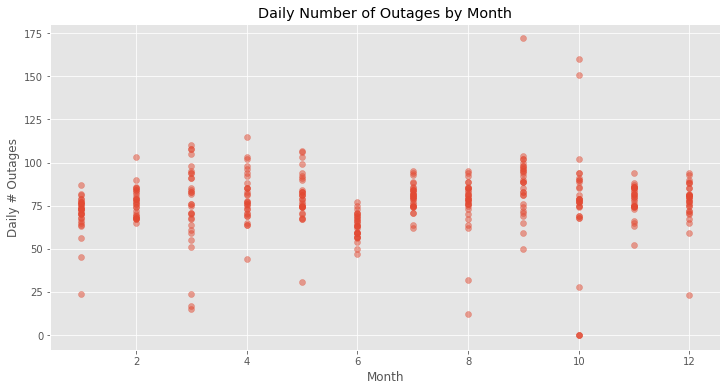

In [116]:
# Plot daily outages
figure(figsize = (12, 6))
plt.scatter(data = daily_outages, x = 'month', y = 'outage_tot', alpha = 0.5)
plt.ylabel('Daily # Outages')
plt.xlabel('Month')
plt.title('Daily Number of Outages by Month')
plt.show()

In [117]:
monthly_tots = daily_outages.groupby(['month']).sum()['outage_tot']

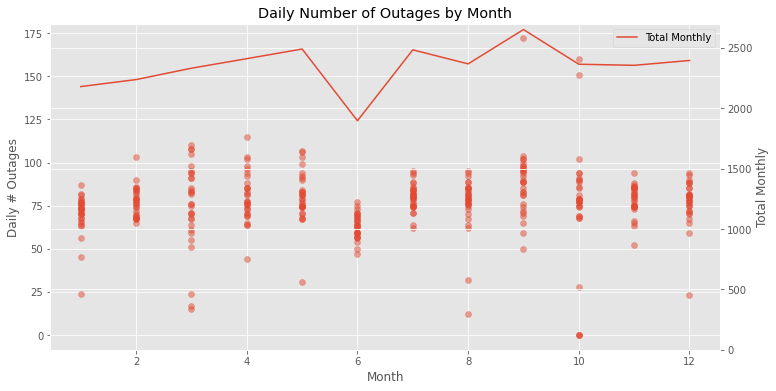

In [118]:
# Plot daily outages
#plt.figure(figsize = (12, 6))
#fig, ax1 = plt.subplots(constrained_layout = True)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.scatter(data = daily_outages, x = 'month', y = 'outage_tot', alpha = 0.5, label = 'Daily')
ax2.plot(monthly_tots.index, monthly_tots, label = 'Total Monthly')
ax1.set_ylabel('Daily # Outages')
ax2.set_ylabel('Total Monthly')
#ax1.set_yticks([0, 25, 50, 75, 100, 125, 150, 175])
#ax2.set_yticks([1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700])
ax2.set_ylim(0, 2700)
ax1.set_xlabel('Month')
plt.title('Daily Number of Outages by Month')
ax2.legend()
plt.show()

# Removed

**OLD/removed: Create dataframe for question on predicting customer hours interrupted (CHI)**

In [119]:
#Explore CHI
#df['Customer-Hours Interruption (CHI)'].apply(type).unique()
#df[df['Customer-Hours Interruption (CHI)'].apply(type) == str]['Customer-Hours Interruption (CHI)']

In [120]:
# # Create dataframe for outage customer hours interrupted (CHI) question
# # DATAFRAME 4
# chi = dur.drop(columns = ['TARGET_Duration_Hours'])
# chi.dropna(subset = ['Customer-Hours Interruption (CHI)'], inplace = True)
# chi

**Comparing outage duration column vs. calculated duration (end time - start time)**

Many of the outage start and end times appear to be default values (12 am and 11:59 pm). Given this, we want to check whether duration values match the end-start range, which could indicate that duration values were calculated from the start and end times, indicating that they too are unreliable, and we may want to aggregate up to predicting outages at the day level. 

Of the observations, 2,347 (8.3%) have a duration that doesn't exactly match the difference between the start and end time. Given this, it seems possible that the start and end times were used to calculate duration, but also possible that they weren't. 

In [121]:
# Create columns for end - start in seconds and hours
df['end_start_sec'] = (df['end'] - df['start'])
df['end_start_hrs'] = df['end_start_sec'].astype('timedelta64[s]')/60/60

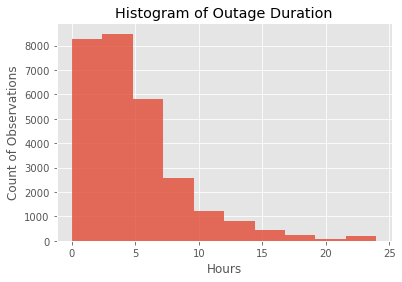

In [122]:
# # Create KDE plot of duration and calculated duration (diff btwn end and start)
# df['end_start_hrs'].plot.kde()
#df['duration'].plot.kde()
# plt.title('KDE Plot of Duration and Difference Between Start and End Time')
#plt.title('KDE Plot of Outage Duration')
plt.hist(df['duration'], alpha = 0.8)
plt.title('Histogram of Outage Duration')
plt.xlabel('Hours')
plt.ylabel('Count of Observations')
plt.show()

(array([1.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 2.6910e+03,
        1.5621e+04, 7.0110e+03, 1.9220e+03, 6.6500e+02, 2.4000e+02]),
 array([-22.96666667, -18.27166667, -13.57666667,  -8.88166667,
         -4.18666667,   0.50833333,   5.20333333,   9.89833333,
         14.59333333,  19.28833333,  23.98333333]),
 <BarContainer object of 10 artists>)

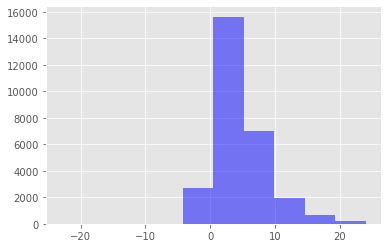

In [123]:
# # Plot difference between start and end times and print describe info
plt.hist(df['end_start_hrs'], color = 'blue', alpha = 0.5)#, range=[-20, 40])
# #plt.hist(df['duration'], color = 'pink', alpha = 0.5, range=[-20, 40], bins = 15)
# plt.xlabel('end - start [hours]')
# plt.ylabel('# of observations')
# plt.title('Histogram of end - start time')
# plt.show()
# df['end_start_hrs'].describe(), df['duration'].describe()

In [124]:
# Investigate whether difference between start and end time columns equals duration
df['match'] = df['duration'] == df['end_start_hrs']
df['diff'] = df['end_start_hrs'] - df['duration']
df.loc[:, ('Duration (Hours)', 'duration', 'start', 'end', 'end_start_sec', 'end_start_hrs', 'match', 'diff')]

,Duration (Hours),duration,start,end,end_start_sec,end_start_hrs,match,diff
0,0.650000,0.650000,2020-01-01 09:46:00,2020-01-01 10:25:00,0 days 00:39:00,0.650000,True,0.000000
1,0.116667,0.116667,2020-01-01 13:44:00,2020-01-01 13:51:00,0 days 00:07:00,0.116667,True,0.000000
2,7.983333,7.983333,2020-01-01 03:16:00,2020-01-01 11:15:00,0 days 07:59:00,7.983333,True,0.000000
3,1.700000,1.700000,2020-01-01 22:17:00,2020-01-01 23:59:00,0 days 01:42:00,1.700000,True,0.000000
4,0.050000,0.050000,2020-01-02 14:38:00,2020-01-02 14:41:00,0 days 00:03:00,0.050000,True,0.000000
...,...,...,...,...,...,...,...,...
28188,2.490000,2.490000,2020-12-29 00:00:00,2020-12-29 02:49:00,0 days 02:49:00,2.816667,False,0.326667
28189,4.140000,4.140000,2020-12-29 12:26:00,2020-12-29 16:40:00,0 days 04:14:00,4.233333,False,0.093333
28190,8.260000,8.260000,2020-12-29 14:02:00,2020-12-29 22:28:00,0 days 08:26:00,8.433333,False,0.173333
28191,1.180000,1.180000,2020-12-29 16:44:00,2020-12-29 18:02:00,0 days 01:18:00,1.300000,False,0.120000


In [125]:
# # Plot mismatches between duration and difference btwn start and stop times
mismatch = df.loc[df['match']==False]
# print('Number of mismatched observations: ', len(mismatch))
# print('Mismatch as a fraction of total observations: ', len(mismatch)/len(df))
# plt.scatter(mismatch['duration'], mismatch['diff'])
# plt.xlabel('duration [hrs]')
# plt.ylabel('mismatch [hrs]')
# plt.show()

In [126]:
# Crate column in mismatch for start and end hour
mismatch['start_hr'] = mismatch['start'].dt.hour
mismatch['end_hr'] = mismatch['end'].dt.hour


/tmp/ipykernel_358/655867170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatch['start_hr'] = mismatch['start'].dt.hour
/tmp/ipykernel_358/655867170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatch['end_hr'] = mismatch['end'].dt.hour


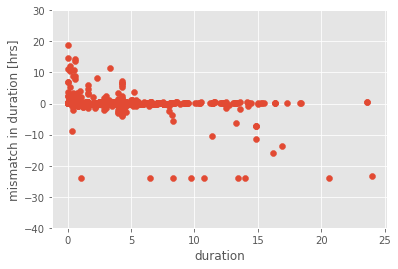

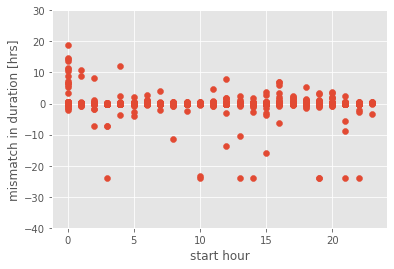

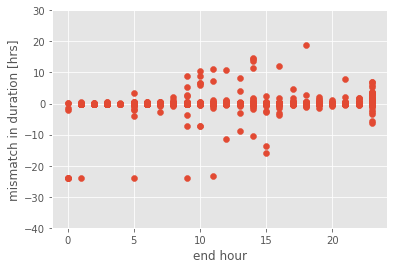

In [127]:
# Plot mismatches zoomed in on where most are located
# See if there's a relationship with outage duration, start hour, or end hour (there doesn't seem to be much)
plots = ['duration', 'start_hr', 'end_hr']
ylabels = ['duration', 'start hour', 'end hour']
for i in np.arange(0, len(plots)):
    plt.scatter(mismatch[plots[i]], mismatch['diff'])
    plt.xlabel(ylabels[i])
    plt.ylabel('mismatch in duration [hrs]')
    plt.ylim(-40, 30)
    plt.show()